# RFM Analysis in Olist Store

Ho Thi Hoang Nhu

# Table of Contents
- [Abstract](#Abstract)
- [Introduction](#Introduction)
  - [RFM model](#RFM-model)
- [My Objective in Project](#My-Objective-in-Project)
- [Dataset selection](#Dataset-selection)
  - [Loading datasets and cleaning](#Loading-datasets-and-cleaning)
  - [Data Preparation](#Data-Preparation)
- [EDA](#EDA)
  - [Yearly Transaction Analysis](#Yearly-Transaction-Analysis)
  - [State-wise Transaction Analysis](#State-wise-Transaction-Analysis)
  - [Daily Revenue Analysis](#Daily-Revenue-Analysis)
  - [Monthly Revenue Analysis](#Monthly-Revenue-Analysis)
  - [Hourly Transactions Analysis](#Hourly-Transactions-Analysis)
  - [Discussion after EDA](#Discussion-after-EDA)
- [Segmentation Strategy in Country](#Segmentation-Strategy-in-Country)
- [RFM Model](#RFM-Model)
  - [RFM Score Distribution](#RFM-Score-Distribution)
    - [Calculating Recency Frequency and Monetary](#Calculating-Recency-Frequency-and-Monetary)
    - [Hypothesis 1](#Hypothesis-1)
    - [Hypothesis 2](#Hypothesis-2)
- [Clustering - Kmeans](#Clustering---Kmeans)
  - [SP city dataset](#SP-city-dataset)
    - [K=3](#K=3)
    - [Identifying the Optimal Number of Clusters](#Identifying-the-Optimal-Number-of-Clusters)
      - [Elbow Method](#Elbow-Method)
      - [Average Silhouette Method](#Average-Silhouette-Method)
  - [Small cities dataset](#Small-cities-dataset)
    - [Identifying the Optimal Number of Clusters](#Identifying-the-Optimal-Number-of-Clusters-1)
      - [Elbow Method](#Elbow-Method-1)
      - [Average Silhouette Method](#Average-Silhouette-Method-1)
    - [Result of Hypothesis 1](#Result-of-Hypothesis-1)
- [Exploring Customer Segmentation](#Exploring-Customer-Segmentation)
  - [Result of Hypothesis 2](#Result-of-Hypothesis-2)
- [Conclusion](#Conclusion)
- [Recommendations](#Recommendations)
- [Limitations](#Limitations)
- [Future Work](#Future-Work)
- [References](#References)


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

# Abstract

This research analyzes customer purchasing behavior based on RFM (Recency, Frequency, Monetary) data for two datasets, "Big City" and "Small Cities."  RFM analysis divides customers into three segments: Low-Value, Potential, and High-Value. Results indicate differences in the distribution of Monetary value, the correlation between Frequency and Monetary value, and the spread of Recency between the two cities. The correlation between Frequency and Monetary value is higher in the small city dataset. Current data is sufficient to definitively confirm the hypothesis that "**Potential or High-Value customers tend to purchase more frequently**". This study provides insights into customer purchasing behavior based on RFM data. Further data and analysis are needed to validate these results and more accurately assess the hypothesis.

**Keywords**: RFM Analysis, Customer Segmentation, Recency, Frequency, Monetary, Hypothesis Testing.

# Introduction

Customer segmentation, the process of dividing a customer base into distinct groups with shared characteristics, is crucial for businesses to understand their customers better, personalize marketing strategies, and ultimately, maximize customer lifetime value (CLTV) (Hair et al., 2014). Among various segmentation techniques, the RFM model (Recency, Frequency, Monetary) has gained significant popularity due to its simplicity, effectiveness, and interpretability (Huang et al., 2010).

## RFM model

The RFM model assigns scores to individual customers based on three key dimensions:

- **Recency**: Captures the time elapsed since the customer's last interaction (e.g., purchase, website visit).
- **Frequency**: Represents the number of transactions or interactions a customer has within a specific timeframe.
- **Monetary**: Reflects the total amount a customer has spent during a particular period.

By combining these scores, businesses can categorize customers into segments with distinct behavioral patterns (Hughes, 1994). For instance, customers with high recency, frequency, and monetary scores are typically classified as "loyal high-value" customers, whereas those exhibiting low scores across all dimensions might be categorized as "lapsed" or "low-potential" customers.

Despite its widespread adoption, the RFM model has limitations. Existing research primarily focuses on traditional industry sectors like retail and overlooks the potential application and potential refinements needed for diverse business contexts (Huang et al., 2010). Additionally, limitations arise from the model's inherent reliance on solely historical data, potentially neglecting the dynamic nature of customer behavior and market trends (Fildes et al., 2009).

Therefore, we strive to contribute to the existing body of knowledge by offering a nuanced understanding of the RFM model's applicability and proposing innovative strategies to adapt it for more effective customer segmentation across diverse business landscapes.



# My Objective in Project

The main goal is to understand customer shopping behavior in both large and small city markets. This involves analyzing key metrics like Recency, Frequency, and Monetary value (RFM) to uncover patterns and differences between these markets. By segmenting customers and comparing their behavior, the aim is to provide actionable insights for businesses to tailor their strategies and capitalize on market opportunities in diverse environments.

# Dataset selection

This is a Brazilian ecommerce public dataset of orders made at Olist Store available at Kaggle. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 

## Loading datasets and cleaning

In [2]:
customers = pd.read_csv("~/Desktop/Master/SE1 - USL/project/E-com/olist_customers_dataset.csv")
orders = pd.read_csv("~/Desktop/Master/SE1 - USL/project/E-com/olist_orders_dataset.csv")
items = pd.read_csv("~/Desktop/Master/SE1 - USL/project/E-com/olist_order_items_dataset.csv")
payments = pd.read_csv("~/Desktop/Master/SE1 - USL/project/E-com/olist_order_payments_dataset.csv")

In [3]:
# print("Customers dataframe:")
print(customers.shape)
display(customers.head())

print("\nOrders dataframe:")
print(orders.shape)
display(orders.head())

print("\nItems dataframe:")
print(customers.shape)
display(items.head())

print("\nPayments dataframe:")
print(customers.shape)
display(payments.head())

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Orders dataframe:
(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Items dataframe:
(99441, 5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Payments dataframe:
(99441, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
### Merging all of datasets
df = customers.merge(orders, on='customer_id', how='inner')
df = df.merge(items, on='order_id', how='inner')
df = df.merge(payments, on='order_id', how='inner')

print("Columns and rows number of dataset: ", df.shape)

Columns and rows number of dataset:  (117601, 22)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117601 non-null  object 
 1   customer_unique_id             117601 non-null  object 
 2   customer_zip_code_prefix       117601 non-null  int64  
 3   customer_city                  117601 non-null  object 
 4   customer_state                 117601 non-null  object 
 5   order_id                       117601 non-null  object 
 6   order_status                   117601 non-null  object 
 7   order_purchase_timestamp       117601 non-null  object 
 8   order_approved_at              117586 non-null  object 
 9   order_delivered_carrier_date   116356 non-null  object 
 10  order_delivered_customer_date  115034 non-null  object 
 11  order_estimated_delivery_date  117601 non-null  object 
 12  order_item_id                 

In [6]:
print("Check duplicate data: ", df.duplicated().sum())

Check duplicate data:  0


In [7]:
# Check for missing values in each column
print(df.isnull().sum())

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64


In [8]:
# Drop rows with missing values
df = df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# Remove rows where the values in the specified columns are empty strings
df = df[df['order_approved_at'] != ""]
df = df[df['order_delivered_carrier_date'] != ""]
df = df[df['order_delivered_customer_date'] != ""]

print(df.isnull().sum())
print("Rows and columns after dropping rows with missing values: ", df.shape)

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64
Rows and columns after dropping rows with missing values:  (115018, 22)


In [9]:
# Check unique customers
print("Check unique customers: ", df["customer_unique_id"].nunique())

Check unique customers:  93341


## Data Preparation

To facilitate the analysis, we will begin by converting the *order_purchase_timestamp* column into a character format. Then, we will split this column into separate components such as month, year, day of the week, and hour of the day. This will enable us to examine the data more effectively and derive insights based on different time dimensions.

In [10]:
# Separate date and time components of 'order_purchase_timestamp'
df['date'] = df['order_purchase_timestamp'].str.split(' ').str[0]
df['time'] = df['order_purchase_timestamp'].str.split(' ').str[1]

# Create 'month', 'year', and 'hourOfDay' variables
df['month'] = pd.to_numeric(df['date'].str.split('-').str[1])
df['year'] = pd.to_numeric(df['date'].str.split('-').str[0])
df['hourOfDay'] = pd.to_numeric(df['time'].str.split(':').str[0])

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['dayOfWeek'] = df['order_purchase_timestamp'].dt.day_name()

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,date,time,month,year,hourOfDay,dayOfWeek
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,2017-05-16,15:05:35,5,2017,15,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,credit_card,8,335.48,2018-01-12,20:48:24,1,2018,20,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,credit_card,7,157.73,2018-05-19,16:07:45,5,2018,16,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,credit_card,1,173.30,2018-03-13,16:06:38,3,2018,16,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,credit_card,8,252.25,2018-07-29,09:51:30,7,2018,9,Sunday


In [11]:
df[['year', 'month']].describe()

,year,month
count,115018.000000,115018.000000
mean,2017.540907,6.033734
std,0.504171,3.227642
min,2016.000000,1.000000
25%,2017.000000,3.000000
50%,2018.000000,6.000000
75%,2018.000000,8.000000
max,2018.000000,12.000000


to compare each year in transactions, we need to have full months or we have the same months for each year.

In [12]:
df[df['year'] == 2016]['month'].describe()

count    337.000000
mean      10.005935
std        0.108947
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       12.000000
Name: month, dtype: float64

Now I just focus on year 2018 to analyis

In [13]:
df = df[df['year'] == 2018]
print("Columns and rows number of dataset: ", df.shape)

Columns and rows number of dataset:  (62551, 28)


# EDA

## Yearly Transaction Analysis

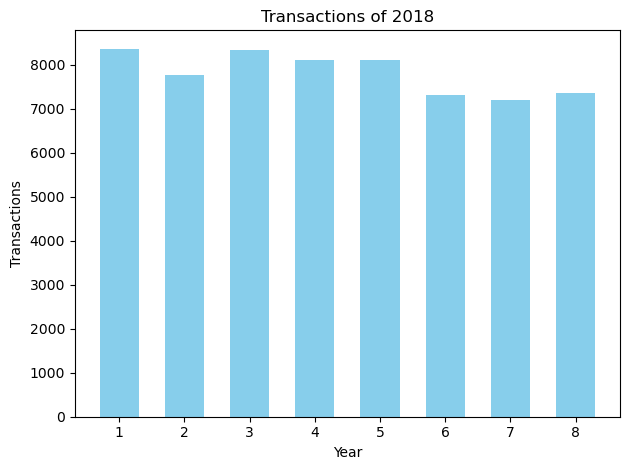

In [14]:
# Count transactions by year
transactions_by_month = df['month'].value_counts().sort_index()

# Plot transactions by year
plt.bar(transactions_by_month.index.astype(str), transactions_by_month.values, color='skyblue', width=0.6)
plt.title('Transactions of 2018')
plt.xlabel('Year')
plt.ylabel('Transactions')
plt.tight_layout()  
plt.show()

The chart illustrates the distribution of events over 8 months in 2018, with most months showing relatively similar patterns except for January and March, which stand out as more prominent. These two months likely demonstrate distinctive characteristics or higher levels of activity compared to the others.

## State-wise Transaction Analysis

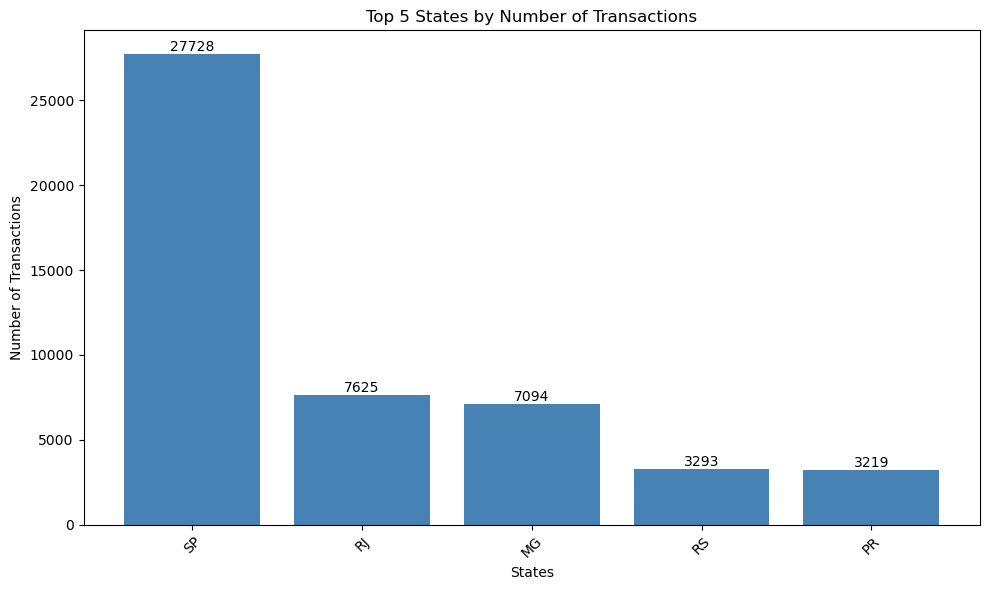

In [15]:
# Group by Country and count the number of transactions
transactions_state = df['customer_state'].value_counts().reset_index()
transactions_state.columns = ['customer_state', 'Number of Transactions']

# Select top 5 countries by number of transactions
top_5_states = transactions_state.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['customer_state'], top_5_states['Number of Transactions'], color='steelblue')
plt.xlabel('States')
plt.ylabel('Number of Transactions')
plt.title('Top 5 States by Number of Transactions')
plt.xticks(rotation=45)
for i, value in enumerate(top_5_states['Number of Transactions']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

The transaction data from São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, and Paraná underscores São Paulo's and Rio de Janeiro's dominance, reflecting their population density and economic vitality. Other states like Minas Gerais, Rio Grande do Sul, and Paraná also contribute, though to a lesser extent, signifying their role in Brazil's online retail landscape.


##  Daily Revenue Analysis

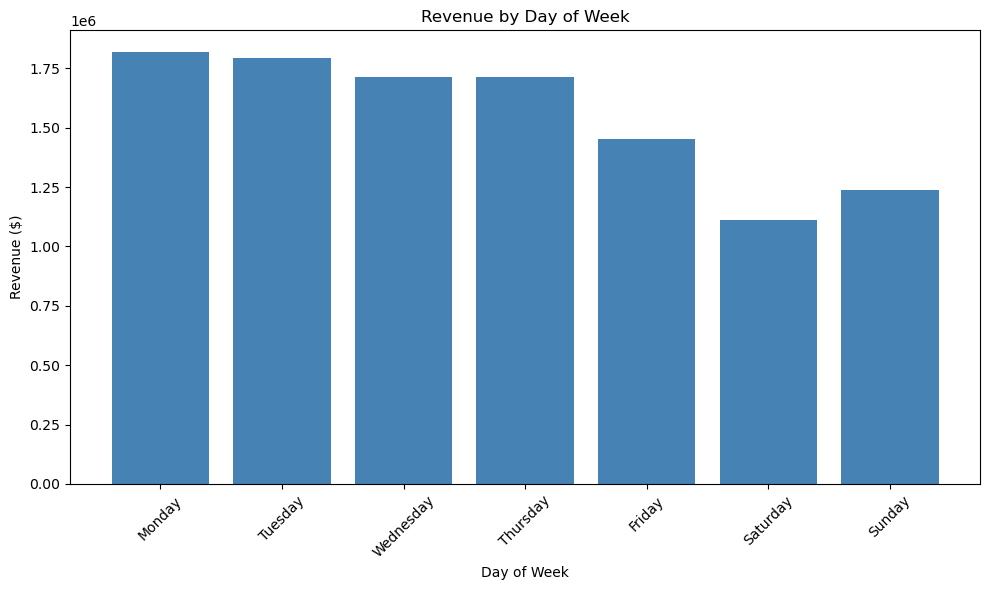

In [16]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['dayOfWeek'] = pd.Categorical(df['dayOfWeek'], categories=day_order, ordered=True)

# Group by 'dayOfWeek' and calculate the payment
revenue_by_day = df.groupby('dayOfWeek')['payment_value'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_day['dayOfWeek'], revenue_by_day['payment_value'], color='steelblue')
plt.xlabel('Day of Week')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates that Monday and Tuesday yield higher revenue compared to other weekdays, with revenue dipping on weekends.

## Monthly Revenue Analysis

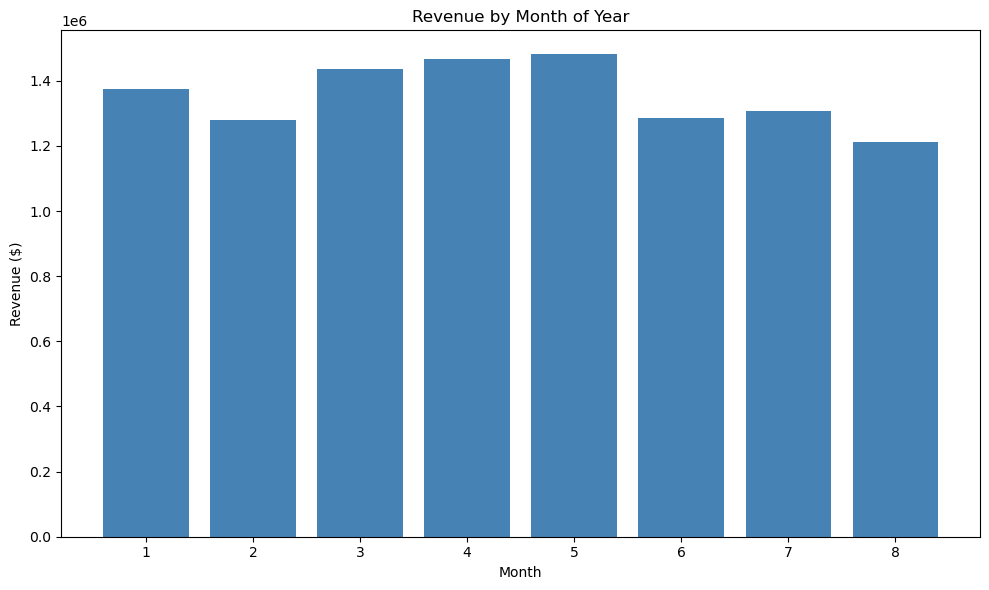

In [17]:
revenue_by_month = df.groupby('month')['payment_value'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_month['month'], revenue_by_month['payment_value'], color='steelblue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Month of Year')
plt.tight_layout()
plt.show()

The data gradually increases from March to May, with May reaching the highest point among the eight months in 2018. 

## Hourly Transactions Analysis

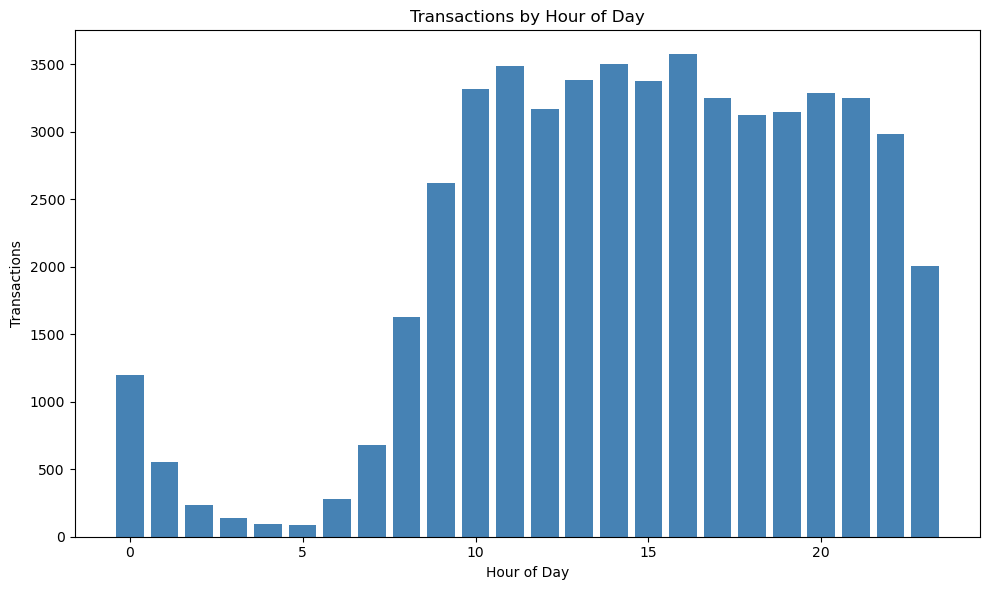

In [18]:
transactions_by_hour = df.groupby('hourOfDay')['customer_unique_id'].nunique().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_hour['hourOfDay'], transactions_by_hour['customer_unique_id'], color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Transactions')
plt.title('Transactions by Hour of Day')
plt.tight_layout()
plt.show()


The graph illustrates that the majority of online orders are placed between 10 AM and 4 PM. This suggests that this particular period of the day is the busiest for online shopping activities. There could be several factors contributing to this trend, such as people's availability during standard working hours, lunch breaks, or leisure time in the afternoon. 

## Discussion after EDA

Expanding on the discussion after EDA, it's evident that as a business, we should carefully consider both the market potential of larger cities and the untapped opportunities in smaller cities. Here's a deeper exploration of the two focal points:

1. **Market Potential in Larger Cities**:
    
    *Understanding Consumer Behavior:*

    - In larger cities like São Paulo (SP), where transaction volumes are high, there's a need to delve into the nuances of consumer behavior. Analyzing this market can uncover trends, preferences, and purchasing patterns of diverse customer segments. 
    
    *Leveraging Economies of Scale:*
    
    - The large transaction volumes in SP present an opportunity to leverage economies of scale. With a sizable customer base, we can negotiate better deals with suppliers, optimize logistics and distribution networks, and potentially reduce operational costs. This can enhance our competitive advantage and profitability in this key market.    
    
    <br>

2. **Exploring Niche Markets in Smaller Cities:**

    *Identifying Unique Customer Segments:*
    
    - While smaller cities may have lower transaction volumes compared to SP, they offer potential for uncovering niche markets or segments with specific needs or preferences. By analyzing transaction data from these cities, we can identify emerging trends, niche customer segments, and underserved market opportunities.

    *Tailoring Offerings to Local Preferences:*
    
    - Each city has its own cultural, economic, and demographic characteristics, influencing consumer behavior and preferences. By focusing on smaller cities, we can gain insights into these localized preferences and tailor our product offerings, marketing campaigns, and customer experiences to better resonate with residents in these areas. 
    
    <br>

3. **Data Segmentation and Analysis Approach:**

    *Segmentation Strategy:*
    
    - To effectively address both market potentials, we propose dividing our data into two streams: one dedicated to analyzing SP and another for analyzing non-SP cities. This segmentation approach allows us to focus our analysis and resources on understanding the unique dynamics of each market.

    *Customer Potential Analysis:*
    
    - Using this segmented approach, we can conduct a thorough analysis of customer potential in both SP and non-SP cities. By leveraging techniques such as RFM analysis, clustering, and predictive modeling, we can identify high-value customer segments, predict future purchasing behavior, and tailor marketing strategies to maximize customer engagement and retention.

In summary, by adopting a dual-focused approach that combines analyzing market potential in larger cities like SP and exploring niche markets in smaller cities, we can uncover valuable insights, capitalize on emerging opportunities, and drive sustainable growth for our business.









# Segmentation Strategy in Country

In [19]:
df_big = df[df['customer_state'] == 'SP']
df_small = df[df['customer_state'] != 'SP']

In [20]:
df_big.shape

(27728, 28)

In [21]:
df_small.shape

(34823, 28)

# RFM Model

The RFM (Recency, Frequency, Monetary) model is a widely applied behavioral analytics technique in customer segmentation (Hughes, 1994). It classifies customers based on their recent interactions, purchase frequency, and total spending value.

1. **Purpose of RFM Analysis**

- Businesses utilize RFM analysis for the following primary objectives:

    - **Understanding Customer Behavior**: RFM provides a granular view of purchasing patterns, including how recently customers interacted with the business (recency), their transaction frequency, and monetary contributions (Gupta, 2014).
    - **Potential Customer Segment Identification**: RFM scores form the basis for grouping customers, enabling targeted marketing initiatives.


2. **The Three Components of RFM**

    - **Recency**: Measures the time since a customer's latest engagement (e.g., purchase, site visit). It's often expressed in days, weeks, or months. A low recency score indicates high engagement  (Kumar & Reinartz, 2012).

    - **Frequency**: Tracks the number of transactions or interactions within a specified timeframe. Higher frequency scores signify greater loyalty (Berger & Nasr, 1998).

    - **Monetary**: Reflects the total amount spent by a customer during a given period. High monetary scores imply customers who generate significant revenue.
    <br>
3. **Importance of RFM**

- Integrating RFM analysis aids businesses in:

    - **Targeted Marketing**: Improves campaign effectiveness by tailoring strategies to specific segments (Blattberg et al., 2008).
    - **Customer Retention and Revenue**: Boosts customer retention and revenue potential.
    - **Resource Allocation**: Optimizes resource allocation by focusing on customers with the highest value (Verhoef et al., 2003).
    - **Product and Service Optimization**: Aligns offerings with distinct customer segment needs.

The RFM model serves as a valuable yet straightforward customer segmentation framework, empowering businesses to create effective marketing strategies.

## RFM Score Distribution
Analyzing the distribution of RFM scores facilitates greater comprehension of customer activity, spending habits, and transaction frequency.

RFM scores enable the identification of potential customer groups:

- **High-Value Customers**: High RFM scores
- **Potential Customers**: Moderate RFM scores
- **Low-Value Customers**: Low RFM scores


So I have **expected outcomes** is that based on the RFM score we have the same group we given.

> ### Hypothesis 1
Dataset will likely segment customers into **THREE GROUPS** 

### Calculating Recency Frequency and Monetary

In [22]:
# Calculate max_date
max_date = df_big['order_purchase_timestamp'].max()

# Calculate 'Diff'
df_big['Diff'] = max_date - df_big['order_purchase_timestamp']
df_big['Diff'] = df_big['Diff'].dt.days

# Calculate RFM metrics
RFM_big = df_big.groupby('customer_unique_id').agg({
    'Diff': 'min',  # Recency
    'order_purchase_timestamp': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).rename(columns={'Diff': 'Recency','order_purchase_timestamp': 'Frequency', 'payment_value': 'Monetary'})

# Summary of RFM DataFrame
RFM_big.describe()

,Recency,Frequency,Monetary
count,22789.000000,22789.000000,22789.000000
mean,118.239677,1.216727,189.058777
std,69.499167,0.740648,489.495107
min,0.000000,1.000000,9.590000
25%,57.000000,1.000000,55.960000
50%,118.000000,1.000000,100.540000
75%,178.000000,1.000000,180.330000
max,240.000000,24.000000,44048.000000


In [23]:
# Calculate max_date
max_date = df_small['order_purchase_timestamp'].max()

# Calculate 'Diff'
df_small['Diff'] = max_date - df_small['order_purchase_timestamp']
df_small['Diff'] = df_small['Diff'].dt.days

# Calculate RFM metrics
RFM_small = df_small.groupby('customer_unique_id').agg({
    'Diff': 'min',  # Recency
    'order_purchase_timestamp': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).rename(columns={'Diff': 'Recency','order_purchase_timestamp': 'Frequency', 'payment_value': 'Monetary'})

# Summary of RFM DataFrame
RFM_small.describe()

,Recency,Frequency,Monetary
count,28822.000000,28822.000000,28822.000000
mean,124.961522,1.208209,226.621867
std,68.736576,0.722903,574.076358
min,0.000000,1.000000,12.890000
25%,65.000000,1.000000,69.345000
50%,128.000000,1.000000,123.490000
75%,184.000000,1.000000,214.277500
max,240.000000,24.000000,30186.000000


Based on the data, we can observe the following insights:

- **Significant Variation in Recency**: The standard deviation of Recency is considerably near when compared to the mean value. This indicates that there is a wide range of time gaps between customer interactions. Some customers may have recently engaged with the business, while others haven't interacted for a longer period. This variation suggests that different strategies may be needed to engage customers based on their recency of activity.

- **Most Customers Make Single Purchases**: The average value of Frequency is close to 1, with a small standard deviation. This suggests that the majority of customers only make a single purchase. It implies that there's a segment of customers who may not engage in repeat purchases frequently. Businesses may need to focus on strategies to encourage repeat purchases and increase customer loyalty among this segment.

- **Diverse Sales Revenue**: The descriptive statistics for total sales volume show a wide range of values. Not only is the standard deviation larger than the mean value, but there is also a minimum value of 9.59 USD and a maximum value of 44,048 USD. This indicates that there is significant diversity in the sales revenue generated by different customers. Some customers contribute minimally to the revenue, while others are high-value clients. This highlights the importance of segmenting customers based on their purchasing behavior and tailoring marketing strategies accordingly.

These statistical findings underscore why customer segmentation is crucial for businesses. The substantial differences among customers suggest that a one-size-fits-all approach is not effective when it comes to sales resource allocation, marketing efforts, or account management. Businesses need to adopt personalized strategies to effectively engage and retain customers based on their distinct characteristics and behaviors.

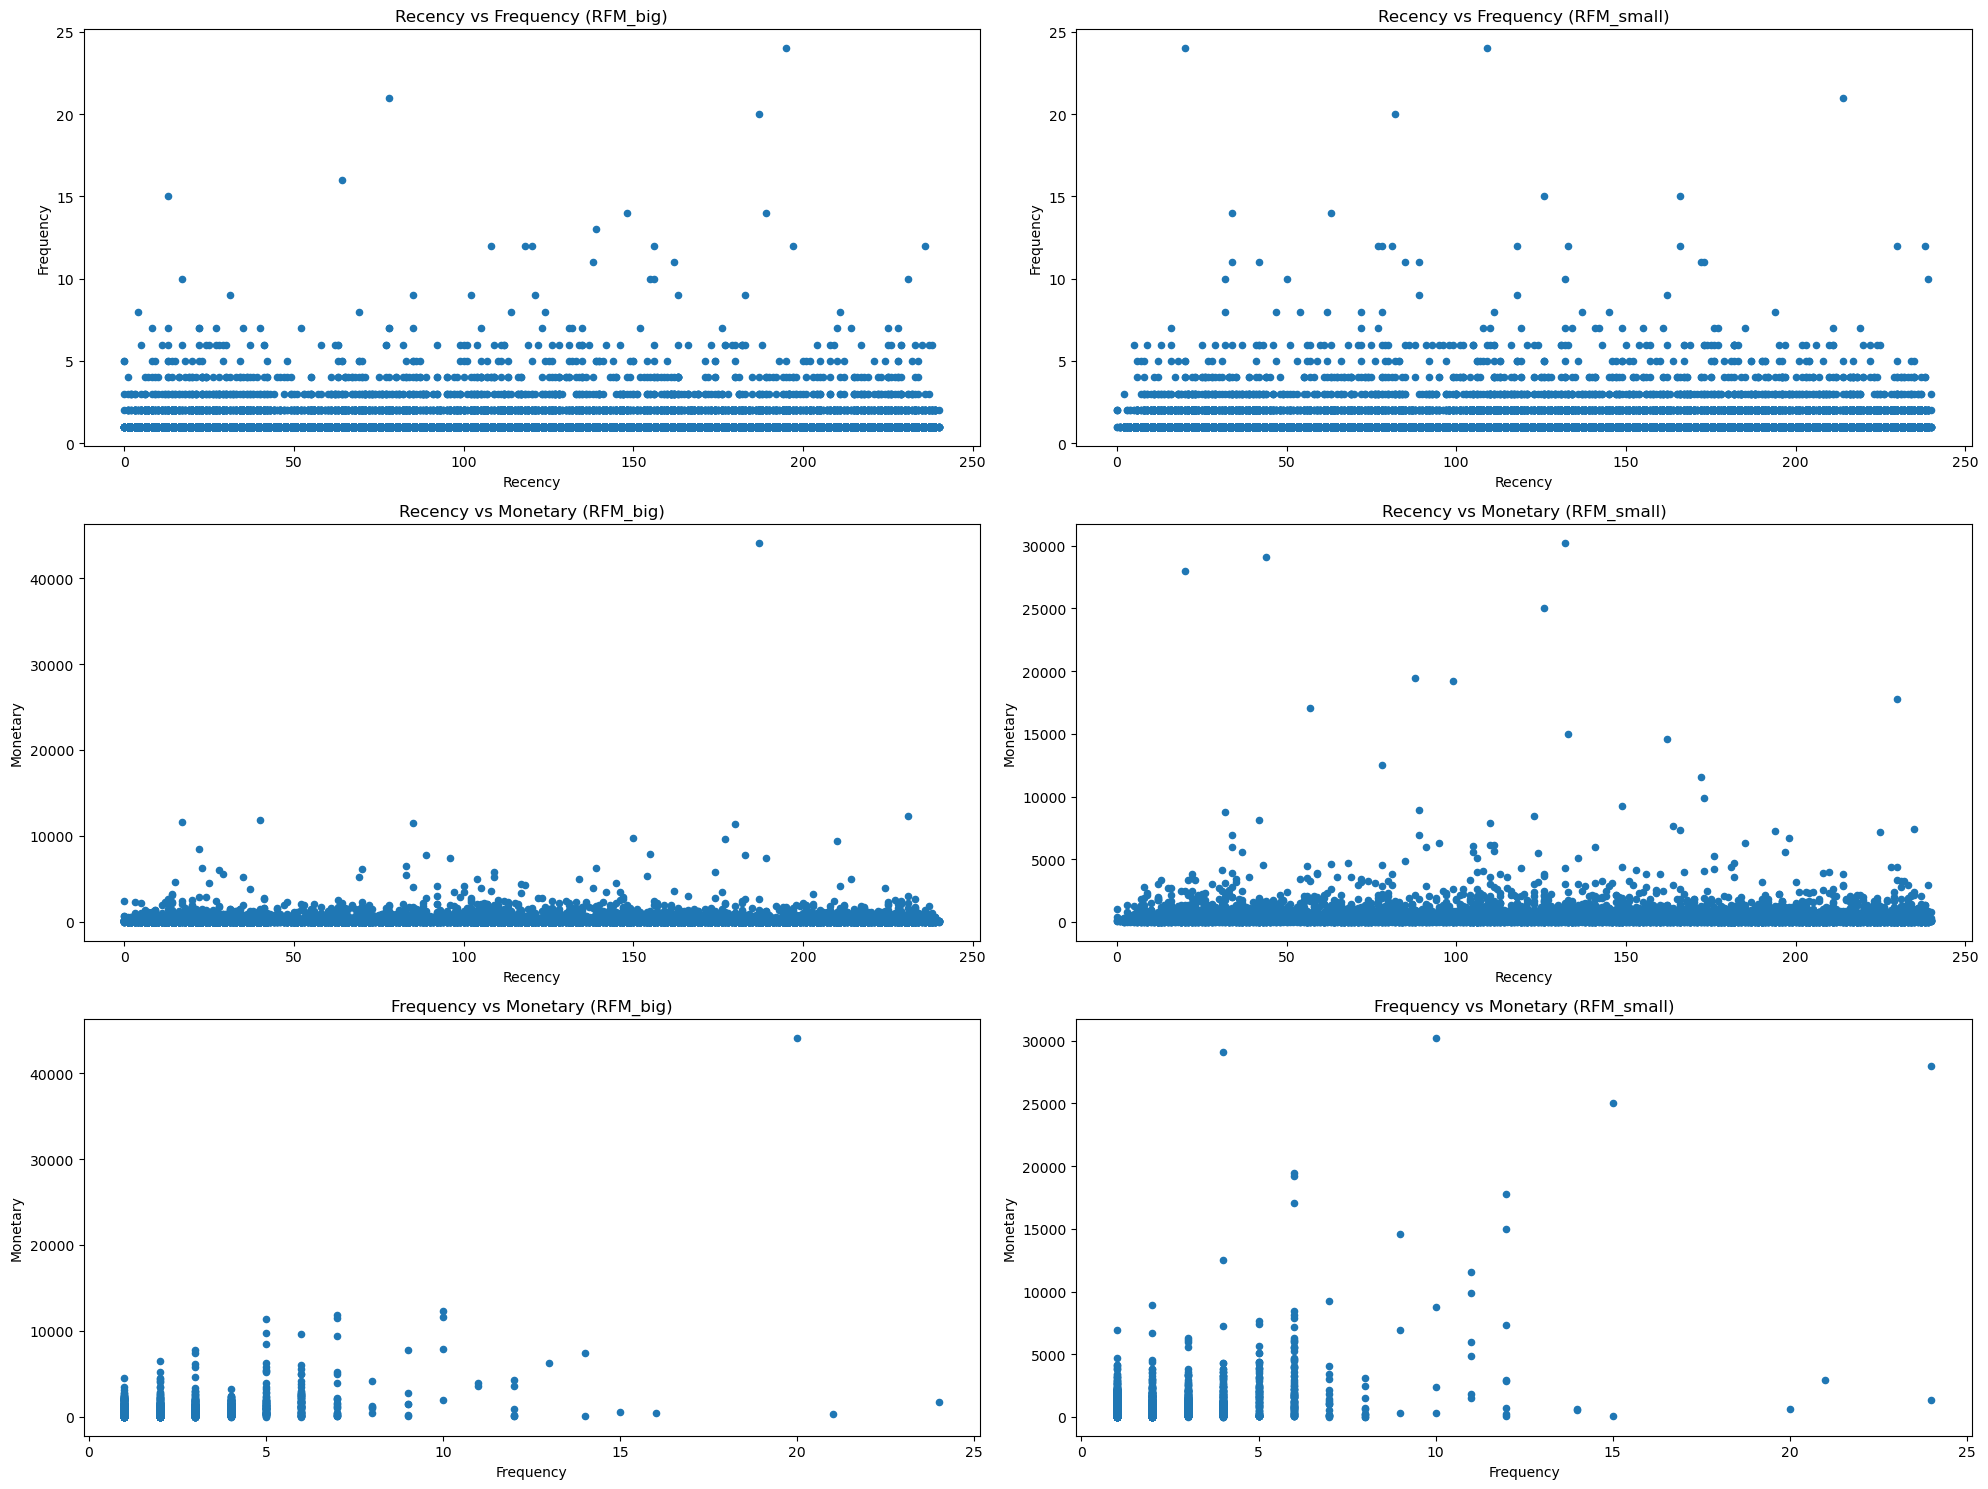

In [24]:
# Create subplots for the first set of scatter plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(20, 15))

# Plot Recency vs Frequency for RFM_big on the left
RFM_big.plot.scatter(x='Recency', y='Frequency', ax=ax1[0])
ax1[0].set_title('Recency vs Frequency (RFM_big)')

# Plot Recency vs Monetary for RFM_big on the left
RFM_big.plot.scatter(x='Recency', y='Monetary', ax=ax2[0])
ax2[0].set_title('Recency vs Monetary (RFM_big)')

# Plot Frequency vs Monetary for RFM_big on the left
RFM_big.plot.scatter(x='Frequency', y='Monetary', ax=ax3[0])
ax3[0].set_title('Frequency vs Monetary (RFM_big)')



# Plot Recency vs Frequency for RFM_small on the right
RFM_small.plot.scatter(x='Recency', y='Frequency', ax=ax1[1])
ax1[1].set_title('Recency vs Frequency (RFM_small)')

# Plot Recency vs Monetary for RFM_small on the right
RFM_small.plot.scatter(x='Recency', y='Monetary', ax=ax2[1])
ax2[1].set_title('Recency vs Monetary (RFM_small)')

# Plot Frequency vs Monetary for RFM_small on the right
RFM_small.plot.scatter(x='Frequency', y='Monetary', ax=ax3[1])
ax3[1].set_title('Frequency vs Monetary (RFM_small)')

plt.tight_layout()
plt.show()


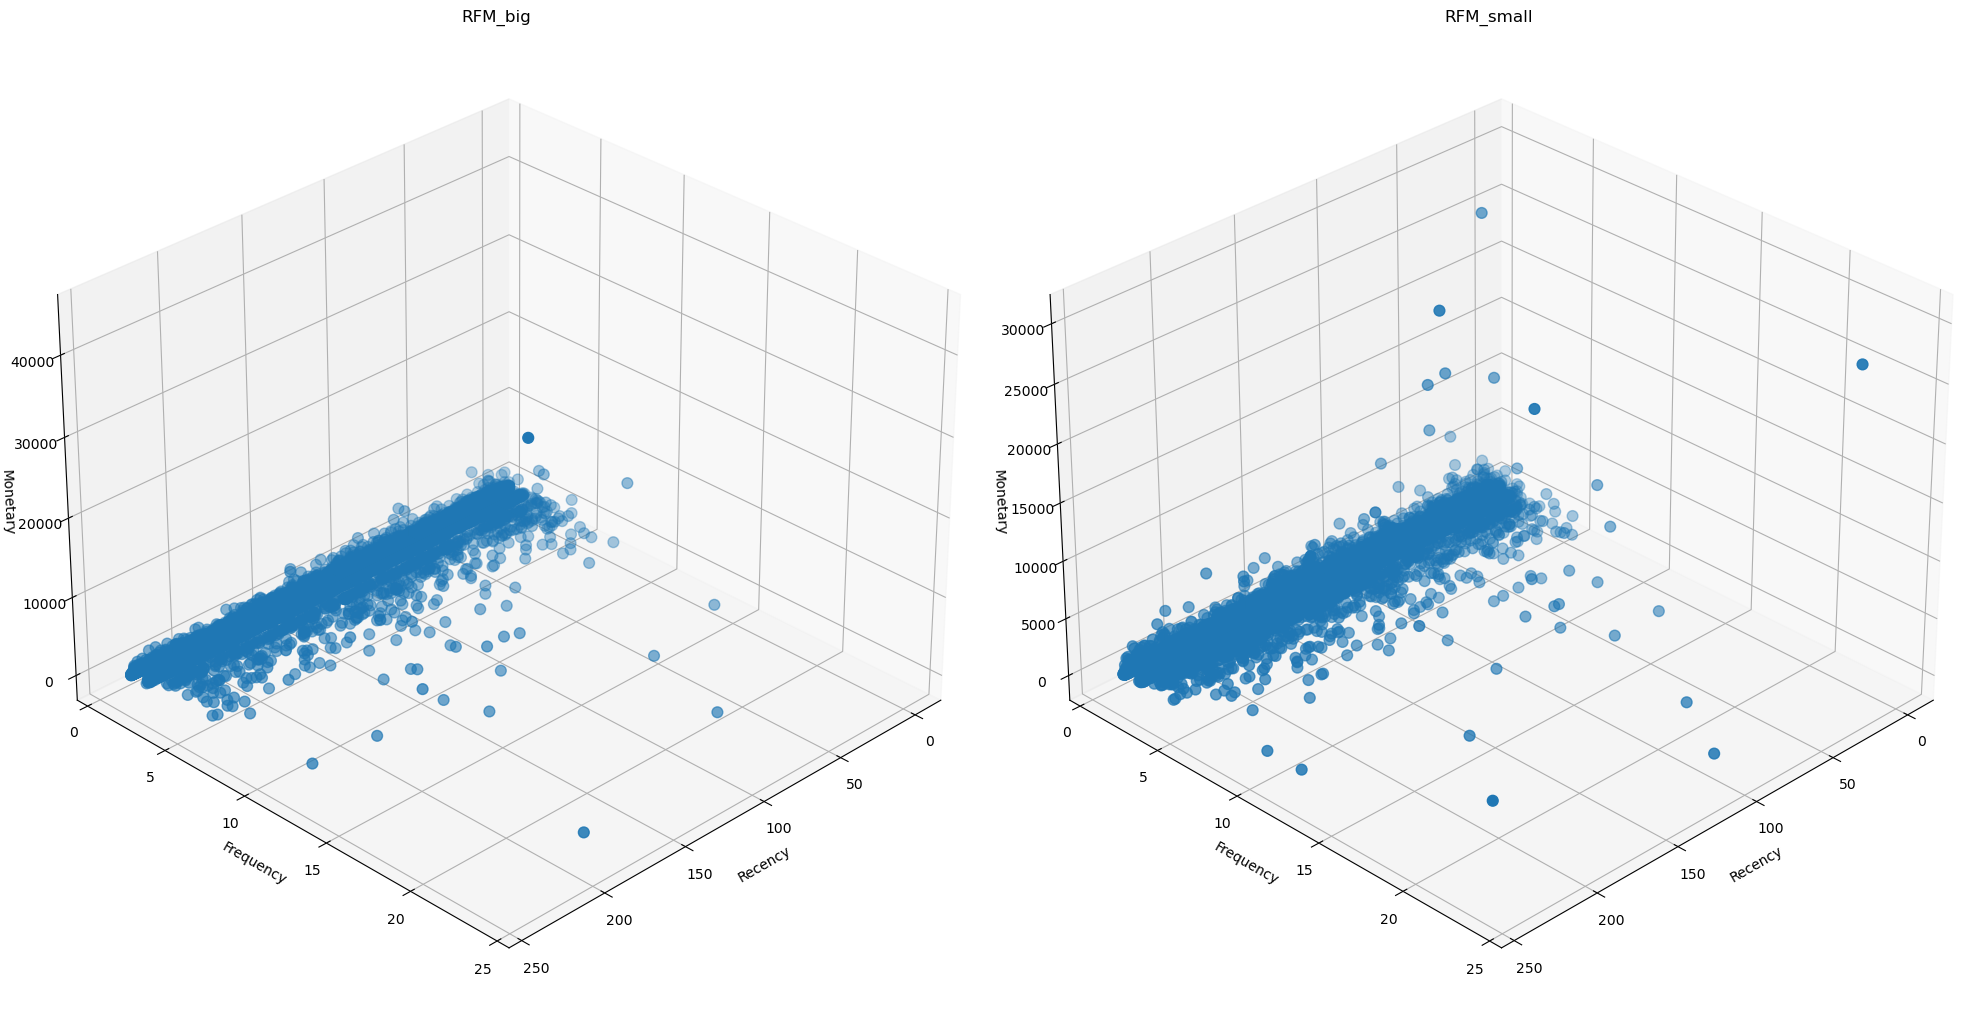

In [25]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Plot the scatter plot for RFM_big on the left subplot
ax1.scatter(RFM_big["Recency"], RFM_big['Frequency'], RFM_big['Monetary'], s=60)
ax1.set_title('RFM_big')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Monetary')
ax1.view_init(30, 45)

# Plot the scatter plot for RFM_small on the right subplot
ax2.scatter(RFM_small["Recency"], RFM_small['Frequency'], RFM_small['Monetary'], s=60)
ax2.set_title('RFM_small')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Monetary')
ax2.view_init(30, 45)

plt.tight_layout()
plt.show()


Based on the 2D and 3D plots, we can observe that smaller cities exhibit greater dispersion compared to the city of São Paulo (SP).

- In São Paulo, we identify 1 outlier for the variable Monetary (> 40000) and 3 outliers for the variable Frequency (> 20). In smaller cities, we notice 4 observations with Frequency > 20 and 1 outliers > 25000.

To achieve balance, I will remove the outliers from São Paulo and the 4 observations from the smaller cities.

In [26]:
RFM_big=RFM_big[(RFM_big["Monetary"]<=40000) & (RFM_big["Frequency"]<20)]
RFM_small=RFM_small[(RFM_small["Monetary"]<=25000) & (RFM_small["Frequency"]<20)]

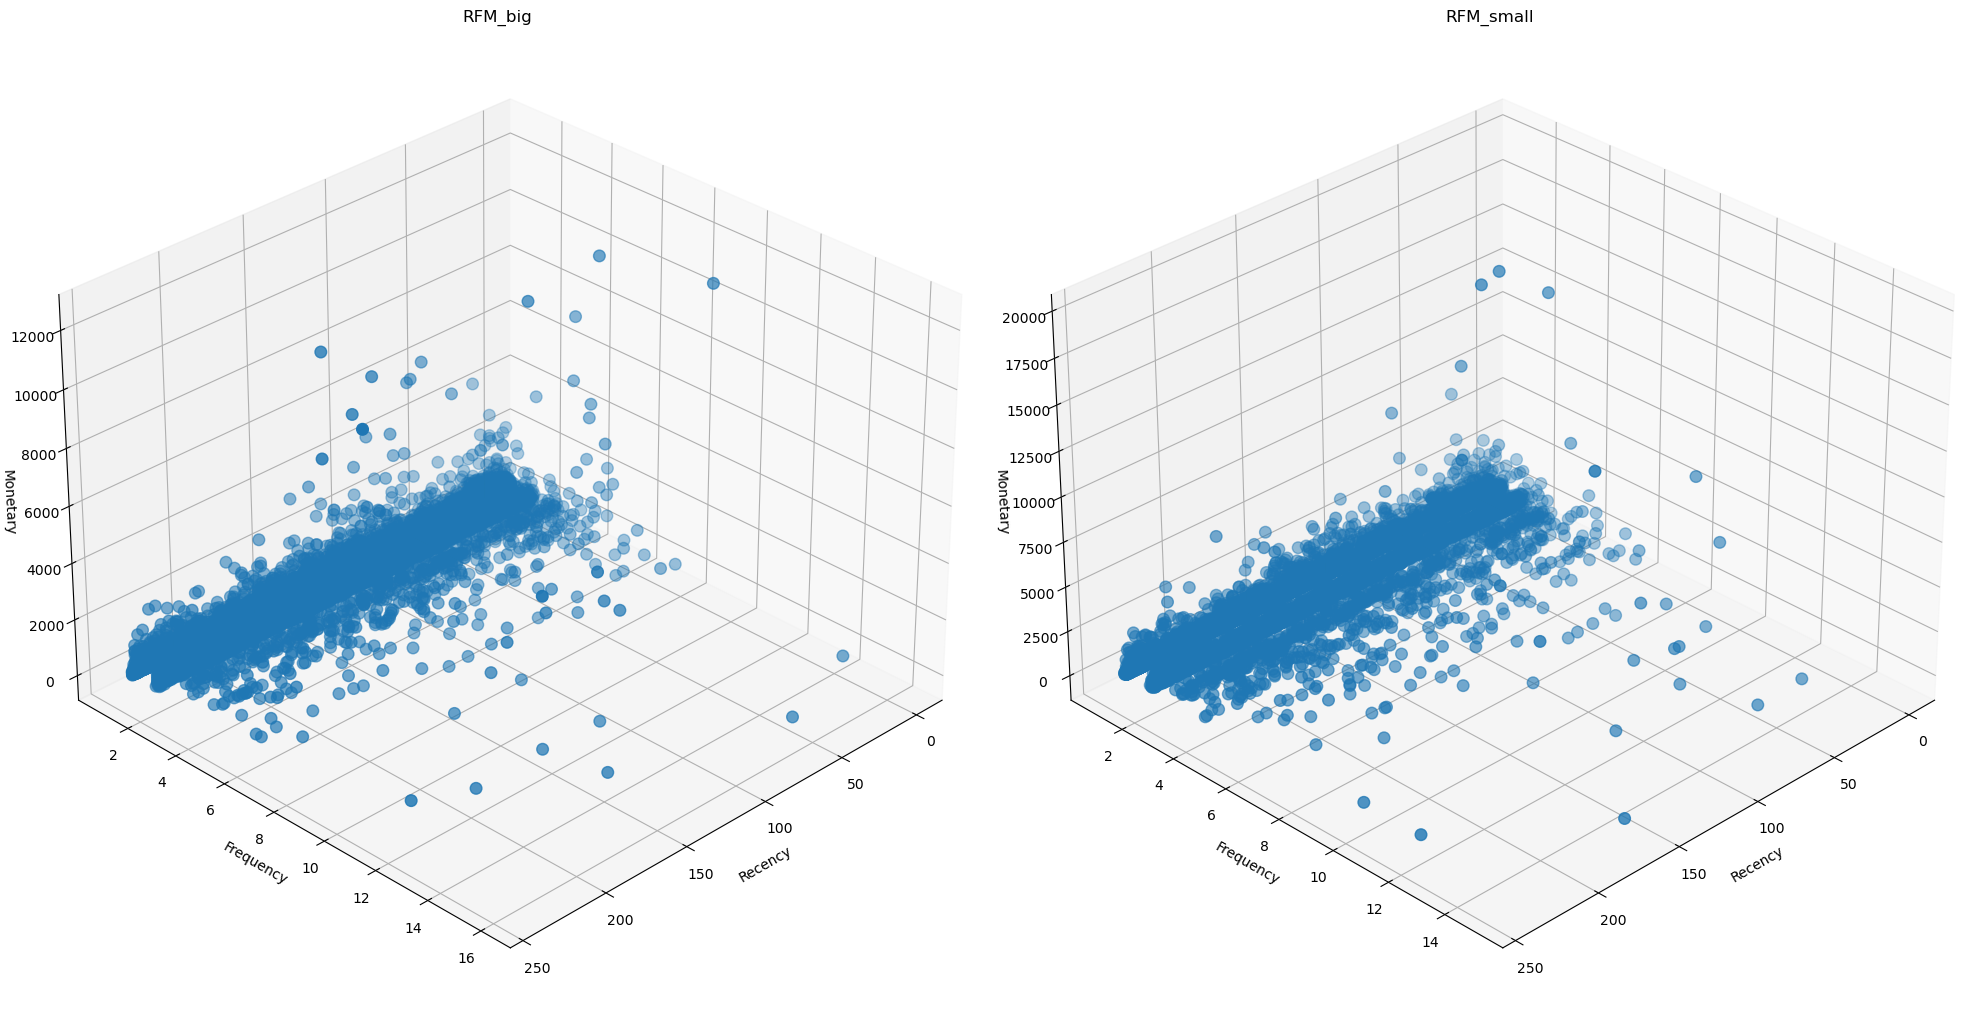

In [27]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Plot the scatter plot for RFM_big on the left subplot
ax1.scatter(RFM_big["Recency"], RFM_big['Frequency'], RFM_big['Monetary'], s=70)
ax1.set_title('RFM_big')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Monetary')
ax1.view_init(30, 45)

# Plot the scatter plot for RFM_small on the right subplot
ax2.scatter(RFM_small["Recency"], RFM_small['Frequency'], RFM_small['Monetary'], s=70)
ax2.set_title('RFM_small')
ax2.set_xlabel('Recency')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Monetary')
ax2.view_init(30, 45)

plt.tight_layout()
plt.show()


Now that both datasets have a certain level of dispersion, we expect to see differences between customer segments in each dataset and discover interesting insights within both datasets.

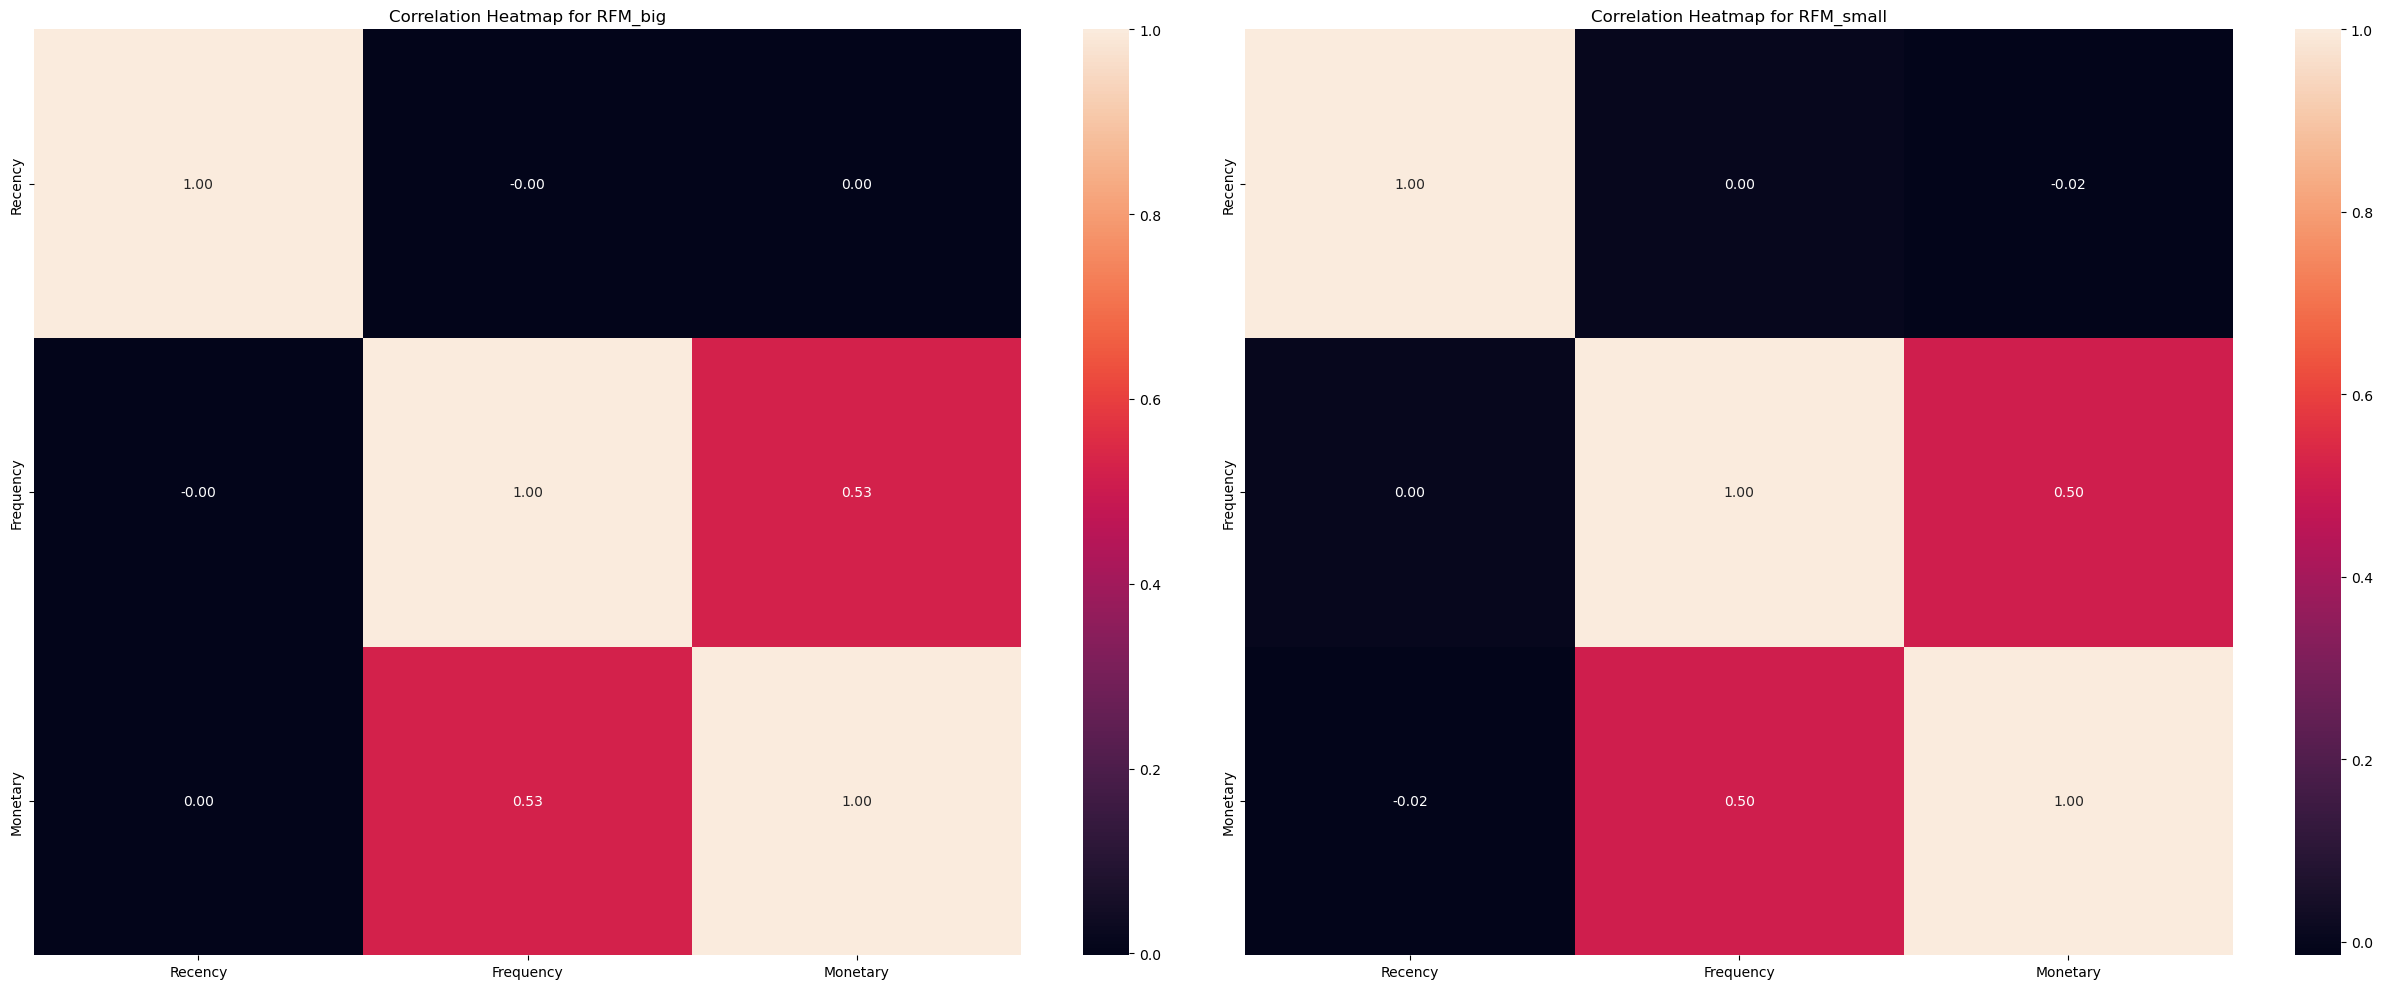

In [28]:
# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Correlation heatmap for RFM_big
sns.heatmap(RFM_big.iloc[:, 0:3].corr(), annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap for RFM_big")

# Correlation heatmap for RFM_small
sns.heatmap(RFM_small.iloc[:, 0:3].corr(), annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap for RFM_small")

plt.tight_layout()
plt.show()


The data reveals no significant correlation between Recency and Monetary or Frequency in both the big and small datasets. This implies that customers may make purchases with high value or frequency regardless of the time elapsed since their last purchase. Other factors such as personal preferences, needs, and promotional programs influence purchasing behavior more than time.

However, Frequency shows a strong positive correlation with Monetary in both datasets:
- SP dataset: 0.53
- Small cities dataset: 0.50

This indicates that customers who purchase frequently tend to spend more over a certain period. This could be due to loyal customers tending to purchase more items or frequent customers potentially buying higher-end products.

As this project does not analyze specific products, **I have a second hypothesis regarding the correlation between Frequency and Monetary. It suggests that for potential or high-value customers, there will be a higher frequency of purchases.**

> ### Hypothesis 2
Potential or high-value customers are likely to make purchases more frequently

# Clustering - Kmeans

**Clustering**, a cornerstone of unsupervised learning, empowers data scientists to group data points into meaningful clusters based on their inherent similarities (Jain, 2010). It facilitates the discovery of latent patterns and relationships within datasets, enabling researchers to gain deeper insights into complex data structures (Xu & Wunsch, 2005). By strategically grouping data points, clustering techniques unveil underlying trends and patterns, fostering a comprehensive understanding of data characteristics.

Within the realm of e-commerce, **K-Means clustering**, a widely adopted technique, plays a crucial role in customer segmentation (Hartigan & Wong, 1979). By iteratively grouping data points based on their proximity to designated cluster centers, K-Means allows for the segmentation of customers into distinct clusters based on shared characteristics (Steinley & Brusco, 2008).

This study utilizes K-Means clustering to segment customers in a Brazilian e-commerce dataset based on their shopping behavior. By identifying distinct customer clusters with similar behavioral patterns, the study aims to:

- **Uncover actionable insights**: K-Means clustering will reveal hidden patterns in customer behavior, providing valuable insights for businesses.
- **Inform strategic decision-making**: By understanding customer segment characteristics, businesses can make informed decisions regarding marketing strategies, product offerings, and resource allocation.
- **Enhance customer experience**: By tailoring services and recommendations to distinct customer segments, businesses have the potential to personalize the customer experience and improve customer satisfaction.

**This investigation leverages K-Means clustering to illuminate customer segments within the Brazilian e-commerce landscape, paving the way for data-driven strategies and enhanced customer experiences.**

To assess the effectiveness of the K-Means clustering algorithm, we rely on two primary metrics:

- **Inertia Value**: This is an absolute measure indicating the sum of squared distances of samples to their closest cluster center. As a rule of thumb, a smaller inertia value suggests a better fit of the clusters to the data.

- **Silhouette Score**: Ranging between -1 and 1, the silhouette score evaluates the cohesion and separation of clusters. A higher score generally indicates that the population is well-matched to its respective clusters, signifying stronger intra-cluster similarity and inter-cluster dissimilarity.

## SP city dataset 

### K=3

In [29]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)


# Scaling input using StandardScaler
scaler = StandardScaler()
RFM_3_big = pd.DataFrame(scaler.fit_transform(RFM_big), columns=RFM_big.columns)

# Run and train main K-means algorithm based on all input features
model3_big = KMeans(n_clusters=3, random_state=60)
model3_big.fit(RFM_3_big)



KMeans(n_clusters=3, random_state=60)

In [30]:
model3_big.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
# Review output cluster labels
RFM_3_big['Cluster_kmeans'] = model3_big.labels_
RFM_3_big

,Recency,Frequency,Monetary,Cluster_kmeans
0,-0.104104,-0.304783,-0.114669,1
1,-0.060938,-0.304783,-0.405945,1
2,0.385116,-0.304783,-0.050985,0
3,0.183673,-0.304783,-0.385149,0
4,0.572171,-0.304783,-0.313339,0
...,...,...,...,...
22781,1.421112,-0.304783,0.101167,0
22782,0.111728,-0.304783,-0.290232,0
22783,-1.240822,-0.304783,-0.385200,1
22784,-0.780379,2.543190,0.204437,1


In [32]:
RFM_3_big['Cluster_kmeans'].value_counts()

Cluster_kmeans
1    11147
0    11075
2      564
Name: count, dtype: int64

In [33]:
from sklearn import metrics
silhouette_score_3_big = metrics.silhouette_score(RFM_3_big, model3_big.labels_, metric='euclidean')

In [34]:
silhouette_score_3_big

0.5409787585253778

In [35]:
model3_big.inertia_

32896.786983230515

<Figure size 1000x1000 with 0 Axes>

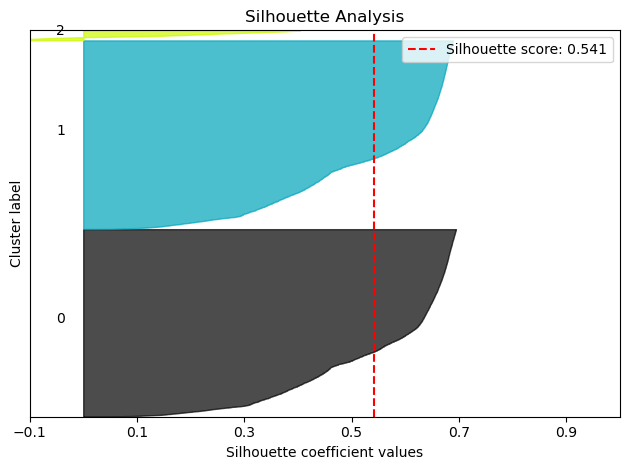

In [36]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_3_big, model3_big.labels_)
plt.tight_layout()
plt.show()

### Identifying the Optimal Number of Clusters

We will employ two widely-used techniques to determine the ideal cluster count:

1. Elbow Method
2. Silhouette Method

#### 1. Elbow Method

In [37]:
# Scaling input using StandardScaler
scaler = StandardScaler()
RFM_big_scaled = pd.DataFrame(scaler.fit_transform(RFM_big), columns=RFM_big.columns)


In [38]:
elbow_scores = []
silhouette_scores=[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(RFM_big_scaled)
    elbow_scores.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score is not defined for a single cluster
        silhouette_scores.append(metrics.silhouette_score(RFM_big_scaled, kmeans.labels_, metric='euclidean'))
  

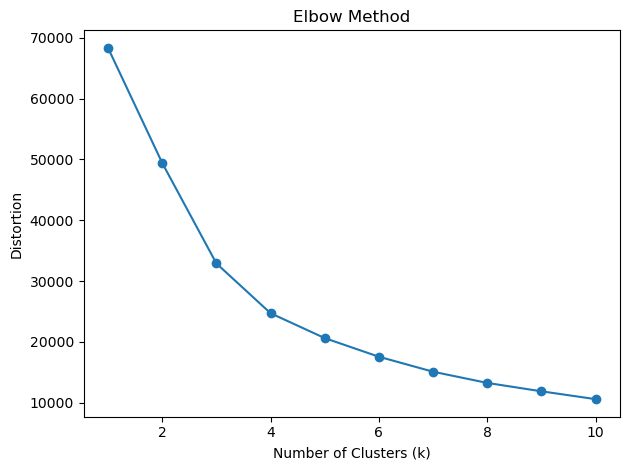

In [39]:
plt.plot(range(1, 11),elbow_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')

plt.tight_layout()
plt.show()

The optimal number of clusters can be determined using the elbow method, which involves examining the inertia plot for a point where the drop in inertia becomes significantly less steep, resembling an elbow. In this case, the elbow method suggests selecting 4 clusters based on the plot analysis.

#### 2. Average Silhouette Method

The average silhouette method assesses the quality of clustering by measuring how well each object fits within its cluster. A higher average silhouette width indicates better clustering. This method calculates the average silhouette of observations across various values of k, with the optimal number of clusters k being the one that maximizes the average silhouette width.

To implement the average silhouette method, we can utilize the silhouette function from the cluster package. The following code snippet computes the average silhouette width for 1 to 10 clusters.

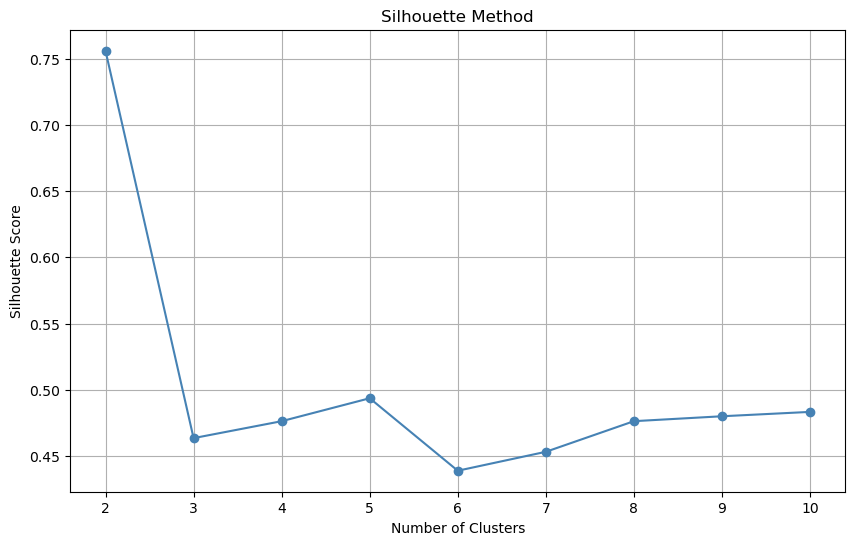

In [40]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='-', color='steelblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

Based on the chart, the optimal number of clusters, as determined by the Silhouette score, appears to be 5. However, for thorough validation, I will reassess the clustering performance for both 4 and 5 clusters individually. This additional scrutiny ensures a comprehensive evaluation of the clustering solution, confirming its robustness and optimal configuration.

In [41]:
# Run model with K=4 to check silhouette score
model4_big = KMeans(n_clusters=4, random_state=0)
model4_big.fit(RFM_big_scaled)

KMeans(n_clusters=4, random_state=0)

In [42]:
# Run model with K=5 to check silhouette score
model5_big = KMeans(n_clusters=5, random_state=0)
model5_big.fit(RFM_big_scaled)

KMeans(n_clusters=5, random_state=0)

<Figure size 1000x1000 with 0 Axes>

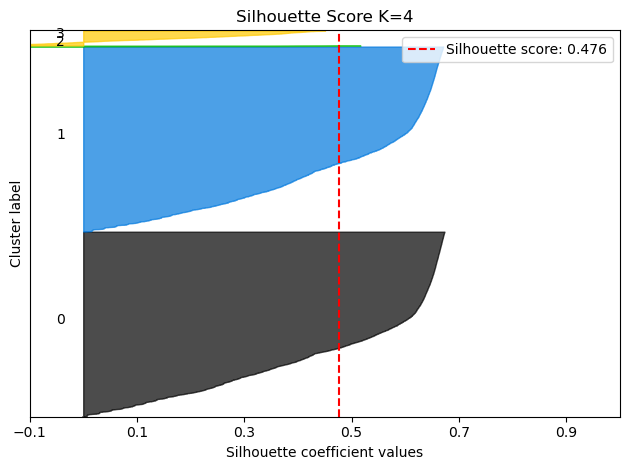

In [43]:
# Plotting Silhouette Score

#Silhouette Score K=4
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_big_scaled, model4_big.labels_)
plt.title('Silhouette Score K=4')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

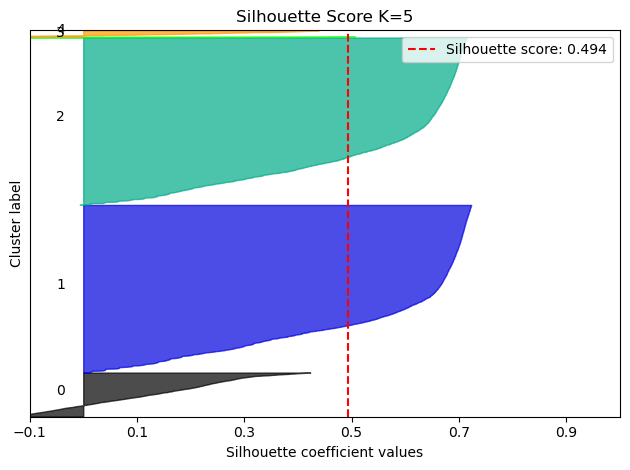

In [44]:
#Silhouette Score K=5
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_big_scaled, model5_big.labels_)
plt.title('Silhouette Score K=5')

plt.tight_layout()
plt.show()

In [45]:
print("Silhouette Score with K=3:",silhouette_score_3_big)
print("Silhouette Score with K=4:",metrics.silhouette_score(RFM_big_scaled, model4_big.labels_, metric='euclidean'))
print("Silhouette Score with K=5:",metrics.silhouette_score(RFM_big_scaled, model5_big.labels_, metric='euclidean'))

Silhouette Score with K=3: 0.5409787585253778
Silhouette Score with K=4: 0.476272029359483
Silhouette Score with K=5: 0.4937932459837234


Visualizing the Silhouette score across a spectrum of K values, as depicted in the accompanying chart, serves to validate the notion that as K increases beyond 5, we observe a trend towards improved accuracy in matching. However, this improvement likely signifies an overfitting of the model, rendering it suboptimal for practical application.

After comparing the Silhouette scores for different numbers of clusters, it appears that my dataset may be best divided into 3 distinct clusters, might be my hypothesis 1 is true. This conclusion is drawn from observing higher Silhouette scores and improved cohesion and separation among data points within these three clusters compared to other configurations.

Now analysis the small cities dataset!

## Small cities dataset 

### K=3

In [46]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)


# Scaling input using StandardScaler
scaler = StandardScaler()
RFM_3_small = pd.DataFrame(scaler.fit_transform(RFM_small), columns=RFM_small.columns)

# Run and train main K-means algorithm based on all input features
model3_small = KMeans(n_clusters=3, random_state=60)
model3_small.fit(RFM_3_small)



KMeans(n_clusters=3, random_state=60)

In [47]:
model3_small.labels_

array([1, 1, 0, ..., 0, 2, 0], dtype=int32)

In [48]:
# Review output cluster labels
RFM_3_small['Cluster_kmeans'] = model3_small.labels_
RFM_3_small

,Recency,Frequency,Monetary,Cluster_kmeans
0,0.829736,1.184389,1.309226,1
1,0.640609,-0.304299,-0.197421,1
2,-0.872410,1.184389,-0.306581,0
3,-1.352503,-0.304299,-0.213771,0
4,0.902477,-0.304299,-0.415912,1
...,...,...,...,...
28810,0.873381,-0.304299,-0.105525,1
28811,0.087775,-0.304299,-0.046161,1
28812,-1.236117,-0.304299,-0.297885,0
28813,-0.988796,7.139139,35.820919,2


In [49]:
RFM_3_small['Cluster_kmeans'].value_counts()

Cluster_kmeans
1    14870
0    13311
2      634
Name: count, dtype: int64

In [50]:
from sklearn import metrics
silhouette_score_3_small = metrics.silhouette_score(RFM_3_small, model3_small.labels_, metric='euclidean')

In [51]:
silhouette_score_3_small

0.5421028959008848

In [52]:
model3_small.inertia_

42595.105541137906

<Figure size 1000x1000 with 0 Axes>

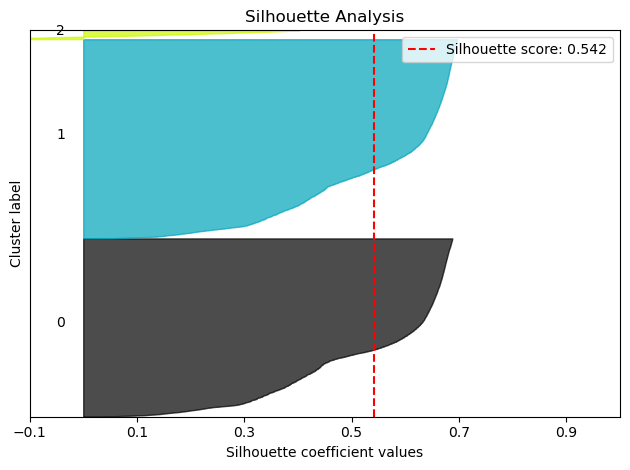

In [53]:
# Plotting Silhouette Score
from scikitplot.metrics import plot_silhouette
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_3_small, model3_small.labels_)
plt.tight_layout()
plt.show()

### Identifying the Optimal Number of Clusters

We will employ two widely-used techniques to determine the ideal cluster count:

1. Elbow Method
2. Silhouette Method

#### 1. Elbow Method

In [54]:
# Scaling input using StandardScaler
scaler = StandardScaler()
RFM_small_scaled = pd.DataFrame(scaler.fit_transform(RFM_small), columns=RFM_small.columns)


In [55]:
elbow_scores = []
silhouette_scores=[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(RFM_small_scaled)
    elbow_scores.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score is not defined for a single cluster
        silhouette_scores.append(metrics.silhouette_score(RFM_small_scaled, kmeans.labels_, metric='euclidean'))
  

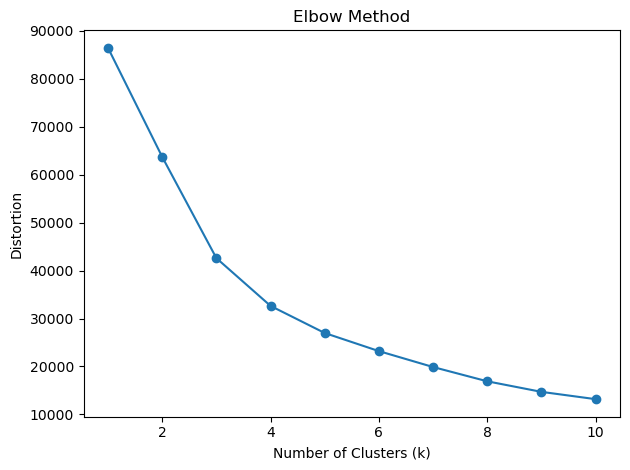

In [56]:
plt.plot(range(1, 11),elbow_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')

plt.tight_layout()
plt.show()

The optimal number of clusters can be determined using the elbow method, which involves examining the inertia plot for a point where the drop in inertia becomes significantly less steep, resembling an elbow. In this case, the elbow method suggests selecting 4 clusters based on the plot analysis.

#### 2. Average Silhouette Method

The average silhouette method assesses the quality of clustering by measuring how well each object fits within its cluster. A higher average silhouette width indicates better clustering. This method calculates the average silhouette of observations across various values of k, with the optimal number of clusters k being the one that maximizes the average silhouette width.

To implement the average silhouette method, we can utilize the silhouette function from the cluster package. The following code snippet computes the average silhouette width for 1 to 10 clusters.

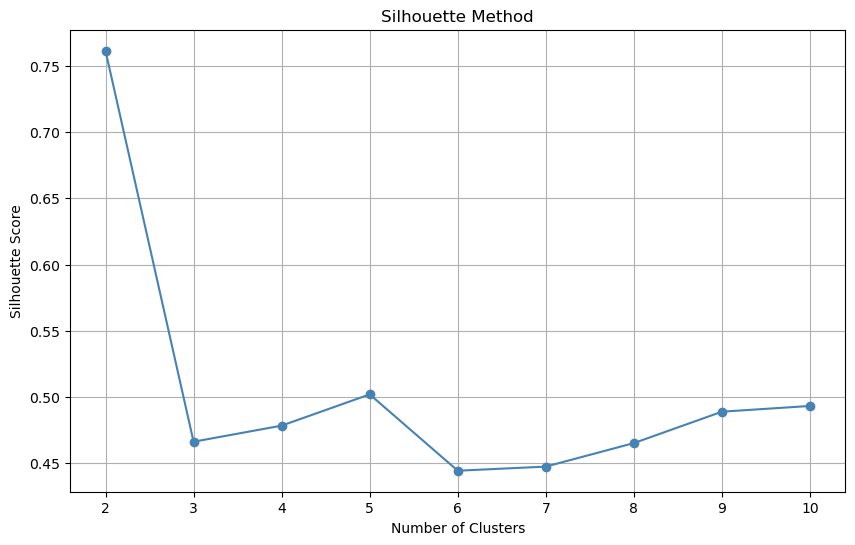

In [57]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='-', color='steelblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

Based on the chart, the optimal number of clusters, as determined by the Silhouette score, appears to be 5. However, for thorough validation, I will reassess the clustering performance for both 4 and 5 clusters individually. This additional scrutiny ensures a comprehensive evaluation of the clustering solution, confirming its robustness and optimal configuration.

In [58]:
# Run model with K=4 to check silhouette score
model4_small = KMeans(n_clusters=4, random_state=60)
model4_small.fit(RFM_small_scaled)

KMeans(n_clusters=4, random_state=60)

In [59]:
# Run model with K=5 to check silhouette score
model5_small = KMeans(n_clusters=5, random_state=60)
model5_small.fit(RFM_small_scaled)

KMeans(n_clusters=5, random_state=60)

<Figure size 1000x1000 with 0 Axes>

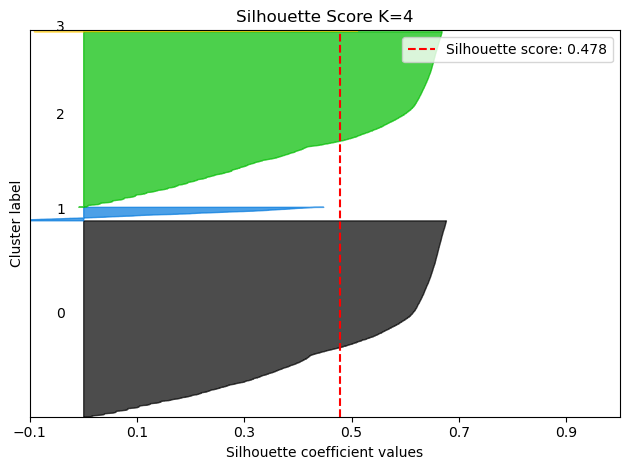

In [60]:
# Plotting Silhouette Score

#Silhouette Score K=4
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_small_scaled, model4_small.labels_)
plt.title('Silhouette Score K=4')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

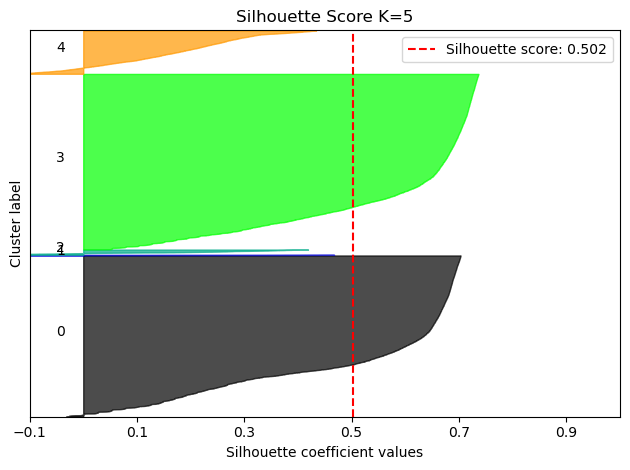

In [61]:
#Silhouette Score K=5
plt.figure(figsize=(10, 10))
plot_silhouette(RFM_small_scaled, model5_small.labels_)
plt.title('Silhouette Score K=5')

plt.tight_layout()
plt.show()

In [62]:
print("Silhouette Score with K=3:",silhouette_score_3_small)
print("Silhouette Score with K=4:",metrics.silhouette_score(RFM_small_scaled, model4_small.labels_, metric='euclidean'))
print("Silhouette Score with K=5:",metrics.silhouette_score(RFM_small_scaled, model5_small.labels_, metric='euclidean'))

Silhouette Score with K=3: 0.5421028959008848
Silhouette Score with K=4: 0.4782205279150739
Silhouette Score with K=5: 0.5018321382000268


The combination of the plot and the silhouette score provides sufficient evidence to support the segmentation of our dataset into three groups. In both datasets, we observe clear clusters and a silhouette score that indicates good separation between clusters.

 > ### Result of Hypothesis 1

Based on this evidence, **we fail to reject Hypothesis 1**, which states that the dataset will likely segment customers into three groups. This suggests that our initial hypothesis is valid, and there are distinct clusters or segments within the data representing different customer groups. Further analysis and exploration of these segments can provide valuable insights for targeted marketing strategies and customer relationship management efforts.

# Exploring Customer Segmentation

In [63]:
model_big = KMeans(n_clusters=3, random_state=60).fit(RFM_big_scaled)
centers_big = model_big.cluster_centers_

model_small = KMeans(n_clusters=3, random_state=60# Exploring Customer Segmentation
).fit(RFM_small_scaled)
centers_small = model_small.cluster_centers_

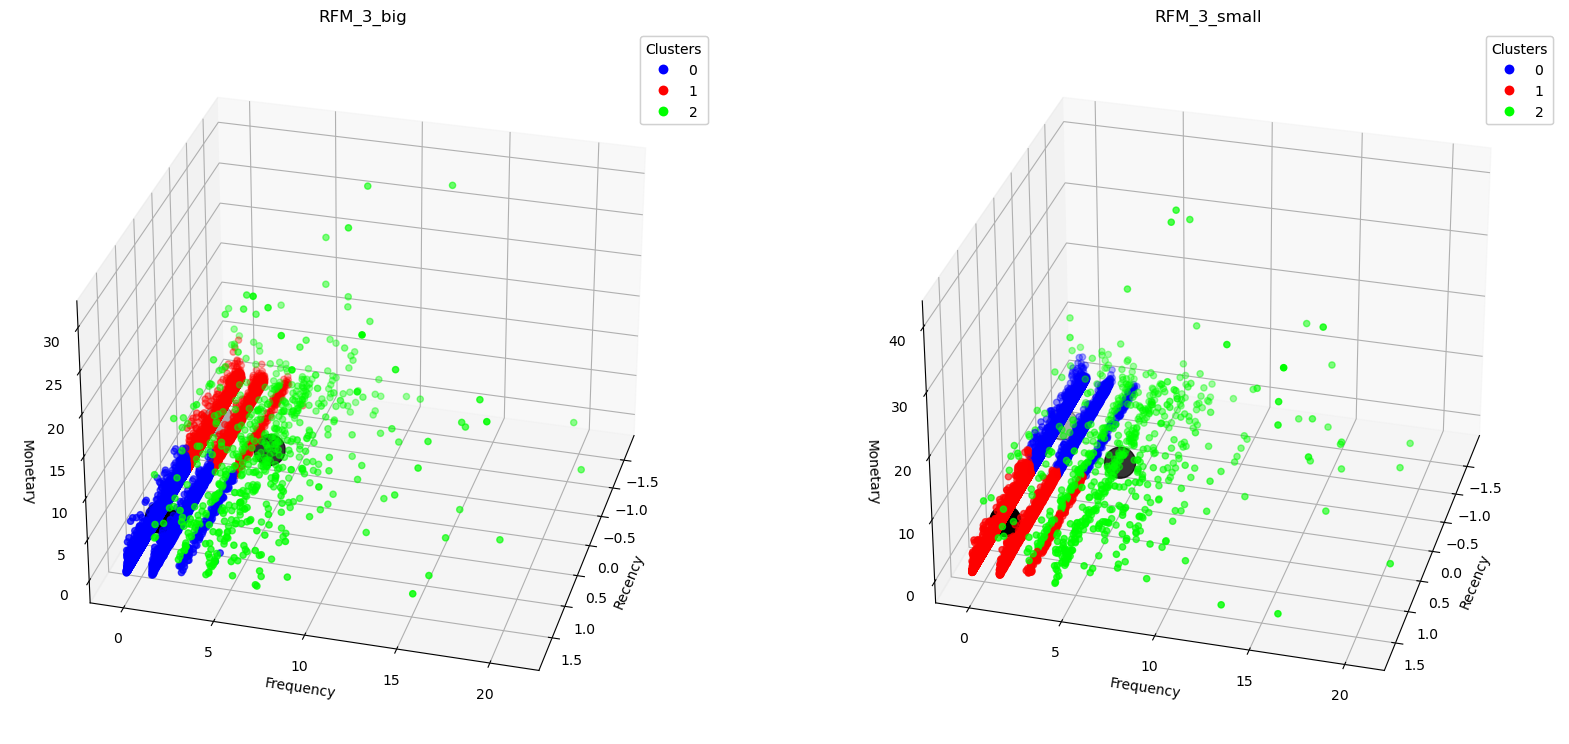

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

# Plot for RFM_3_big dataset
scatter_big = axes[0].scatter(RFM_big_scaled["Recency"], RFM_big_scaled['Frequency'], 
                              RFM_big_scaled['Monetary'], cmap='brg', 
                              c=model_big.predict(RFM_big_scaled))
axes[0].scatter(centers_big[:, 0], centers_big[:, 1], 
                centers_big[:, 2], c='black', s=500)
axes[0].set_title('RFM_3_big')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_zlabel('Monetary')
axes[0].view_init(30, 15)


# Create legend manually for the first plot
legend1 = axes[0].legend(*scatter_big.legend_elements(), title="Clusters", loc="upper right")
axes[0].add_artist(legend1)

# Plot for RFM_3_small dataset
scatter_small = axes[1].scatter(RFM_small_scaled["Recency"], RFM_small_scaled['Frequency'], 
                                RFM_small_scaled['Monetary'], cmap='brg', 
                                c=model_small.predict(RFM_small_scaled))
axes[1].scatter(centers_small[:, 0], centers_small[:, 1], 
                centers_small[:, 2], c='black', s=500)
axes[1].set_title('RFM_3_small')
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Frequency')
axes[1].set_zlabel('Monetary')
axes[1].view_init(30, 15)


# Create legend manually for the second plot
legend2 = axes[1].legend(*scatter_small.legend_elements(), title="Clusters", loc="upper right")
axes[1].add_artist(legend2)

plt.show()


- **Monetary** axis:
    - **SP city dataset**: The data points are more dispersed, indicating greater variance in customer spending. This suggests a wider range of customer spending behaviors in larger cities like São Paulo compared to smaller cities.
    - **Small cities dataset**: The data points appear more clustered, suggesting less variation in customer spending. This might imply a more homogenous spending pattern within smaller cities.

- **Frequency** axis:
    - **SP city dataset**: Higher density around the lower end of the Frequency spectrum (0-5) compared to the small cities dataset. This suggests a larger proportion of customers in SP city who purchase less frequently.
    - Similar density to the small cities dataset in the mid-range of Frequency (5-20).

**Insights:**
- Larger cities like São Paulo typically offer an abundance of shopping options, including smaller stores and online alternatives. This might lead to customers spreading their purchases across different vendors, resulting in a larger proportion falling into the lower frequency range.

- The fast-paced environment and diverse offerings in larger cities could contribute to more frequent impulse purchases, potentially reflected in the similar density for the mid-range frequency (5-20) compared to smaller cities.

In [65]:
RFM_T_big = pd.DataFrame(scaler.inverse_transform(RFM_big_scaled))

RFM_T_small = pd.DataFrame(scaler.inverse_transform(RFM_small_scaled))

In [66]:
RFM_T_big.columns = RFM_big.columns
RFM_T_big["ID"] = RFM_big.index
RFM_T_big["Cluster_kmeans"]= model_big.labels_

RFM_T_small.columns = RFM_small.columns
RFM_T_small["ID"] = RFM_small.index
RFM_T_small["Cluster_kmeans"]= model_small.labels_

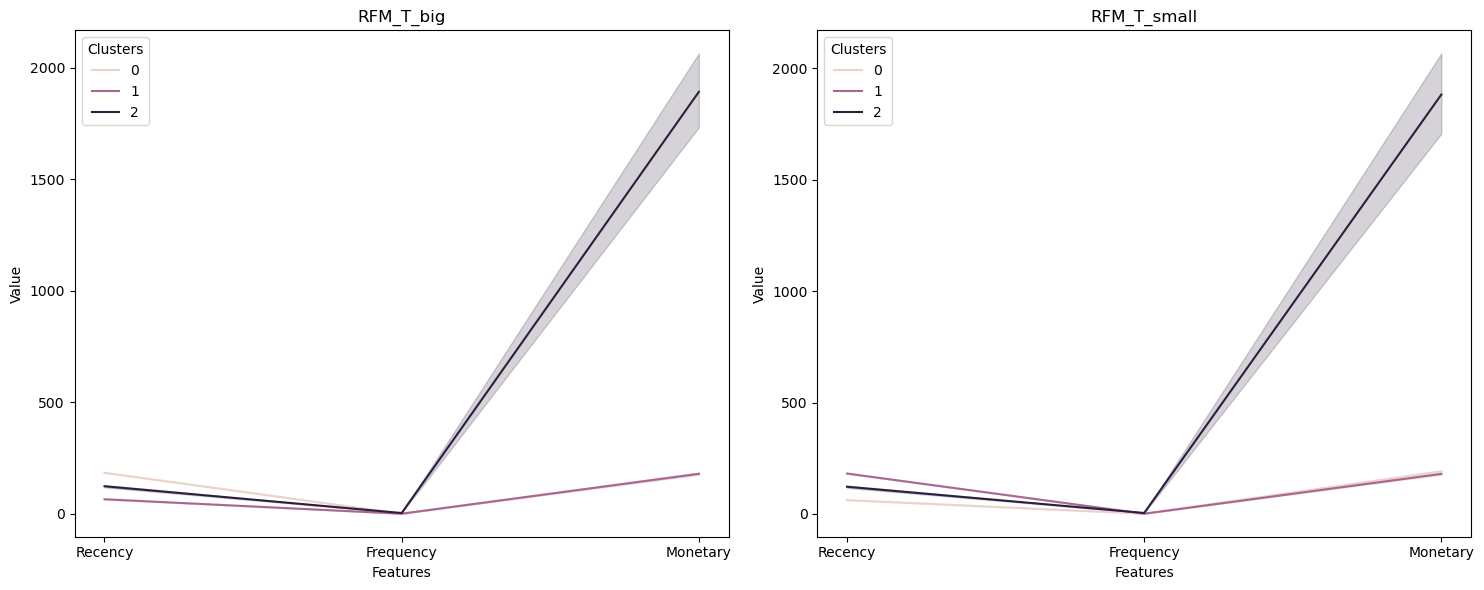

In [67]:
# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Line plot for RFM_T_big dataset
line_model_big = pd.melt(RFM_T_big.reset_index(),
                         id_vars=["ID", "Cluster_kmeans"],
                         value_vars=["Recency", "Frequency", "Monetary"],
                         var_name="Features",
                         value_name="Value")
sns.lineplot(x="Features", y="Value", hue="Cluster_kmeans", data=line_model_big, ax=axes[0])
axes[0].set_title('RFM_T_big')
axes[0].legend(title='Clusters')

# Line plot for RFM_T_small dataset
line_model_small = pd.melt(RFM_T_small.reset_index(),
                           id_vars=["ID", "Cluster_kmeans"],
                           value_vars=["Recency", "Frequency", "Monetary"],
                           var_name="Features",
                           value_name="Value")
sns.lineplot(x="Features", y="Value", hue="Cluster_kmeans", data=line_model_small, ax=axes[1])
axes[1].set_title('RFM_T_small')
axes[1].legend(title='Clusters')

plt.tight_layout()
plt.show()


In [68]:
RFM_T_big.groupby("Cluster_kmeans").agg({
    'Recency':['mean','min','max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean','min','max','count']})

Recency                         Frequency            \
                      mean         min         max      mean       min   
Cluster_kmeans                                                           
0               184.490312  125.723210  245.397227  1.122751  0.999675   
1                65.870807    8.027276  126.712252  1.133111  0.999675   
2               124.109880    8.027276  243.419144  4.216968  0.999675   

                              Monetary                                  
                      max         mean        min           max  count  
Cluster_kmeans                                                          
0                3.869290   180.512638  15.171002   2459.601409  11075  
1                3.869290   179.984715  10.668695   2611.533380  11147  
2               15.347749  1891.712192  32.881670  14688.441220    564

In [69]:
RFM_T_small.groupby("Cluster_kmeans").agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']})

Recency               Frequency                Monetary  \
                      mean    min    max      mean  min   max         mean   
Cluster_kmeans                                                               
0                62.125761    0.0  123.0  1.129667  1.0   3.0   191.379282   
1               181.344183  121.0  240.0  1.135171  1.0   3.0   179.827603   
2               122.034700    5.0  239.0  4.397476  1.0  15.0  1881.739306   

                                        
                  min       max  count  
Cluster_kmeans                          
0               12.89   2713.36  13311  
1               16.37   2590.61  14870  
2               28.81  19457.04    634

In [70]:
RFM_big['Profile_kmeans'] = model3_big.labels_
RFM_big['Profile_kmeans'].replace({0: "Low-Value", 1: "Potential", 2: "High-Value"}, inplace = True)

RFM_small['Profile_kmeans'] = model3_small.labels_
RFM_small['Profile_kmeans'].replace({0: "Low-Value", 1: "Potential", 2: "High-Value"}, inplace = True)

In [71]:
model3_small.labels_

array([1, 1, 0, ..., 0, 2, 0], dtype=int32)

In [72]:
RFM_big.Profile_kmeans.describe(include=['O'])

count         22786
unique            3
top       Potential
freq          11147
Name: Profile_kmeans, dtype: object

SP city dataset:
- We have 22,786 customers.
- The majority of customers (11,147) are classified as Potential Customers.

In [73]:
RFM_small.Profile_kmeans.describe(include=['O'])

count         28815
unique            3
top       Potential
freq          14870
Name: Profile_kmeans, dtype: object

Small cities dataset:
- We have 28,815 customers.
- The majority of customers (14,870) are classified as Potential Customers.

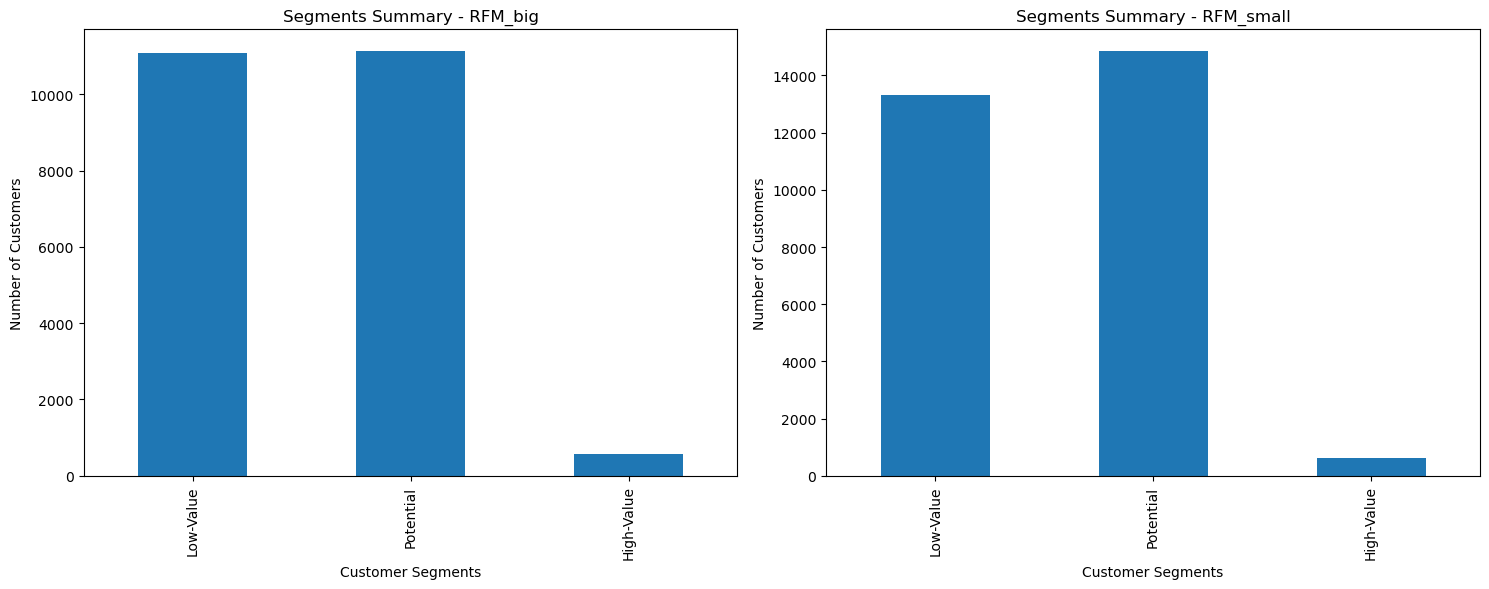

In [74]:
order = ["Low-Value", "Potential", "High-Value"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for RFM_big dataset
RFM_big.groupby('Profile_kmeans').Profile_kmeans.count().loc[order].plot.bar(ax=axes[0])
axes[0].set_xlabel("Customer Segments")
axes[0].set_ylabel("Number of Customers")
axes[0].set_title("Segments Summary - RFM_big")

# Bar plot for RFM_small dataset
RFM_small.groupby('Profile_kmeans').Profile_kmeans.count().loc[order].plot.bar(ax=axes[1])
axes[1].set_xlabel("Customer Segments")
axes[1].set_ylabel("Number of Customers")
axes[1].set_title("Segments Summary - RFM_small")

plt.tight_layout()
plt.show()


RFM_big (Large City):
- Low-Value: This segment appears to have the highest number of customers.
- Potential: This segment has a moderate number of customers.
- High-Value: This segment has the lowest number of customers.

RFM_small (Small City):
- Low-Value: This segment also seems to have the highest number of customers.
- Potential: This segment has a similar or slightly lower number of customers compared to RFM_big.
- High-Value: This segment again has the lowest number of customers, but the difference compared to other segments seems smaller than in RFM_big.

My Insight:
Businesses in both cities might target a broader range of customers, resulting in a sizeable low-value segment. However, the smaller city might have a slightly more focused approach to acquiring high-value customers, leading to a relatively larger proportion in that segment compared to RFM_big.

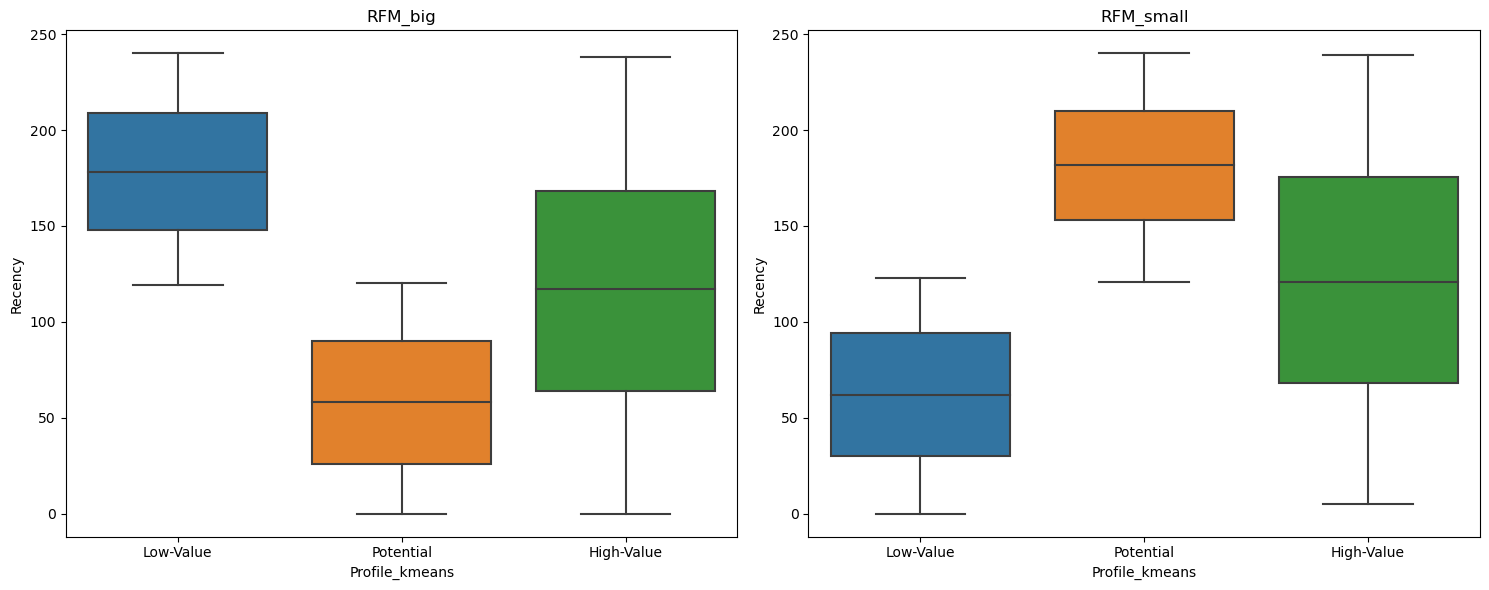

In [75]:
# Box plot to visualize Profile_kmeans vs Recency
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Profile_kmeans', y='Recency', data=RFM_big,order=order, ax=axes[0]).set_title("RFM_big")
sns.boxplot(x='Profile_kmeans', y='Recency', data=RFM_small,order=order, ax=axes[1]).set_title("RFM_small")
plt.tight_layout()
plt.show()


RFM_big (SP City):

- Cluster 0 (Low-Value): Shows lower median Recency and a smaller IQR, indicating more frequent purchases with less variability.
- Cluster 1 (Potential): Exhibits intermediate median Recency and a moderate IQR, suggesting moderate variability in purchase frequency.
- Cluster 2 (High-Value): Displays the highest median Recency and widest IQR, indicating less frequent purchases with higher variability, potentially due to a wider range of spending behaviors.

RFM_small (Small Cities):

- Similar patterns to RFM_big with Cluster 0 showing the lowest median Recency, Cluster 1 with intermediate Recency, and Cluster 2 with the highest Recency.
- However, the data spread appears wider in the small city dataset, particularly in Clusters 1 and 2, suggesting greater variability in purchase frequency.


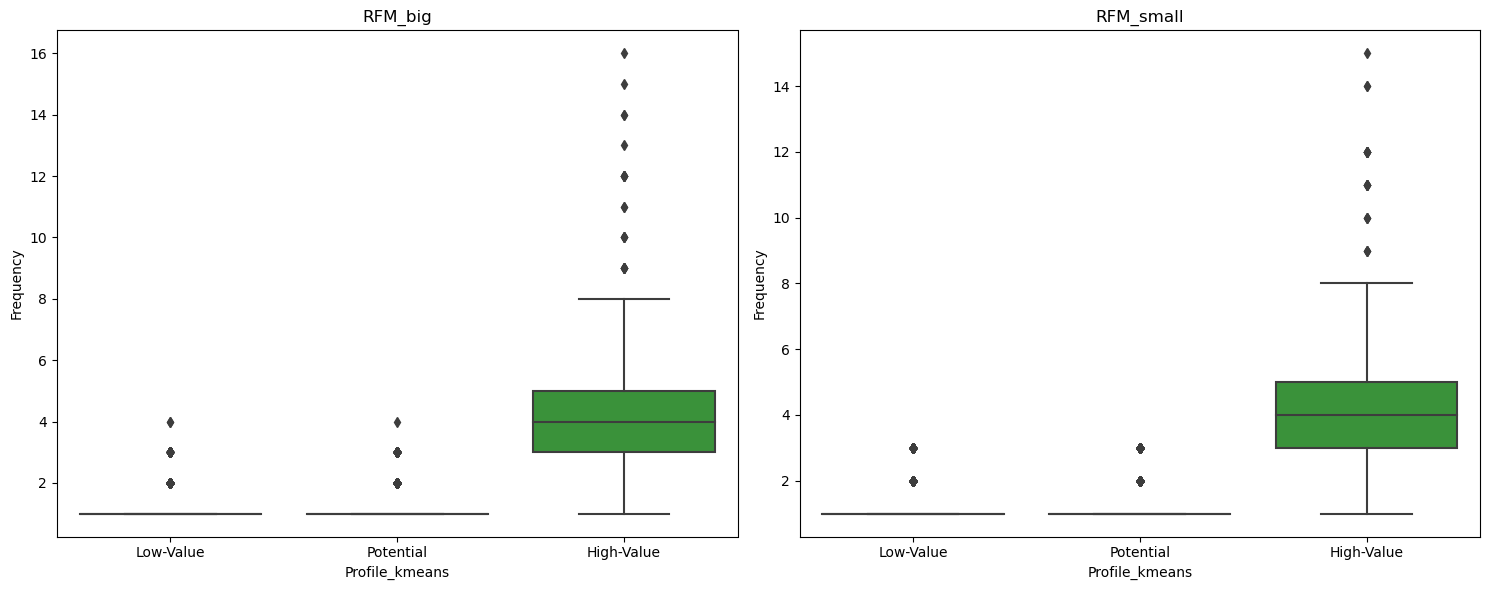

In [76]:
# Box plot to visualize Profile_kmeans vs Frequency
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Profile_kmeans', y='Frequency', data=RFM_big,order=order, ax=axes[0]).set_title("RFM_big")
sns.boxplot(x='Profile_kmeans', y='Frequency', data=RFM_small,order=order, ax=axes[1]).set_title("RFM_small")
plt.tight_layout()
plt.show()



RFM_big (SP City):

- Cluster 0 (Low-Value): Higher median Frequency, smaller IQR.
- Cluster 1 (Potential): Intermediate Frequency, moderate IQR.
- Cluster 2 (High-Value): Moderately frequent Frequency, widest IQR.

RFM_small (Small Cities):

- Similar patterns, with Cluster 0 having the highest median Frequency and smallest IQR, - Cluster 1 with intermediate Frequency and moderate IQR, and Cluster 2 with a median Frequency similar to Cluster 1 but a wider IQR.

However, data spread is wider in the small city dataset, especially for Cluster 2, indicating greater variability in purchase frequency.

After analyzing the two plots, several explanations can be inferred:

- Shopping options: More store variety in larger cities may lead to higher Frequency. Customers in larger cities may have different access to stores and shopping habits, potentially resulting in more frequent purchases in certain segments.

- Purchase motivations: High-value customers in both city sizes may make less frequent but larger purchases, affecting the median Frequency. In large cities, this behavior may contribute to higher Recency and wider IQR in Cluster 2. In small cities, some high-value customers might engage in more frequent purchases, further influencing the Frequency distribution.

- Data characteristics: The wider spread in the small city dataset may be due to smaller sample sizes within each cluster, resulting in less precise estimates of the distribution.

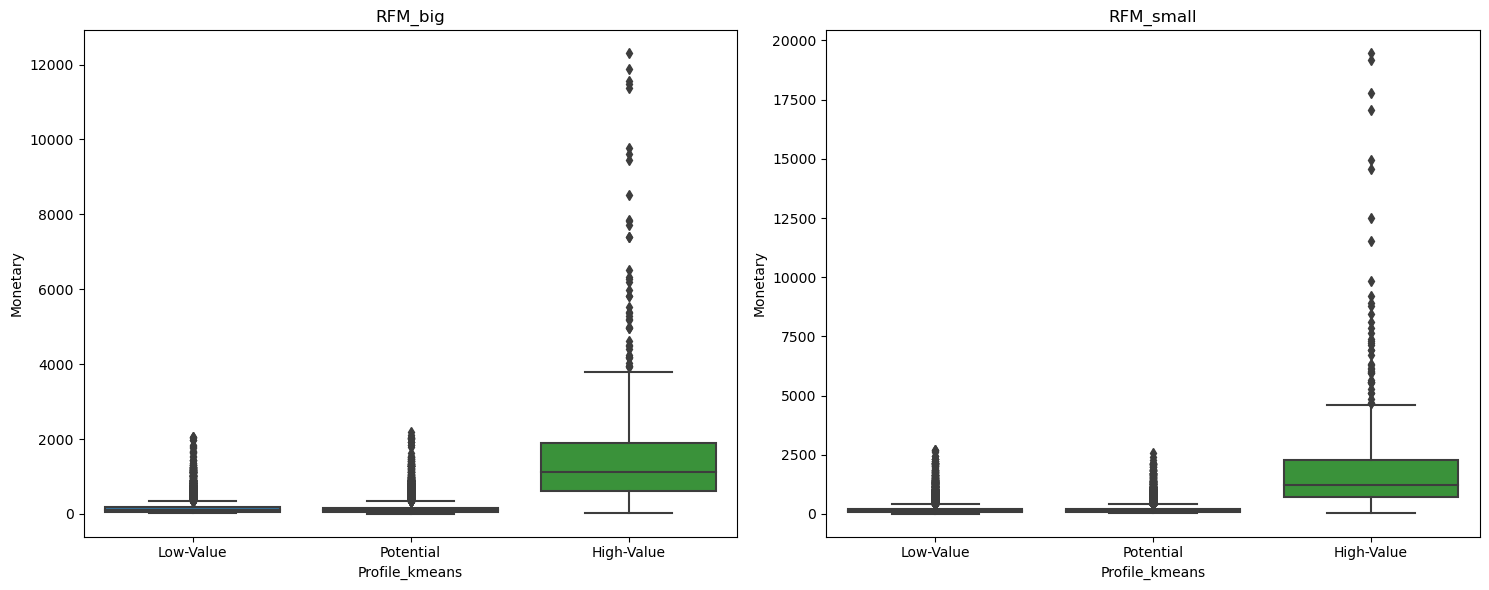

In [77]:
# Box plot to visualize Profile_kmeans vs Monetary
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Profile_kmeans', y='Monetary', data=RFM_big,order=order, ax=axes[0]).set_title("RFM_big")
sns.boxplot(x='Profile_kmeans', y='Monetary', data=RFM_small,order=order, ax=axes[1]).set_title("RFM_small")
plt.tight_layout()
plt.show()

RFM_big (SP City):

- Cluster 0 (Low-Value): Lower median Monetary value, smaller IQR.
- Cluster 1 (Potential): Intermediate median Monetary value, moderate IQR.
- Cluster 2 (High-Value): Highest median Monetary value, widest IQR.

RFM_small (Small Cities):

- Similar patterns, with Cluster 0 showing the lowest median Monetary and smallest IQR, Cluster 1 with intermediate median Monetary and moderate IQR, and Cluster 2 with the highest median Monetary and widest IQR.
- However, data spread is wider in the small city dataset, especially for Cluster 1 and 2, indicating greater variability in spending amounts.

Explanations:

- Spending power: Larger cities may have higher average spending power, leading to wider monetary ranges across all clusters.
- Product offerings: Different product availability in each city may influence spending patterns, with larger cities potentially offering more high-end products.
- Data characteristics: Wider spread in small city data may be due to smaller sample sizes.

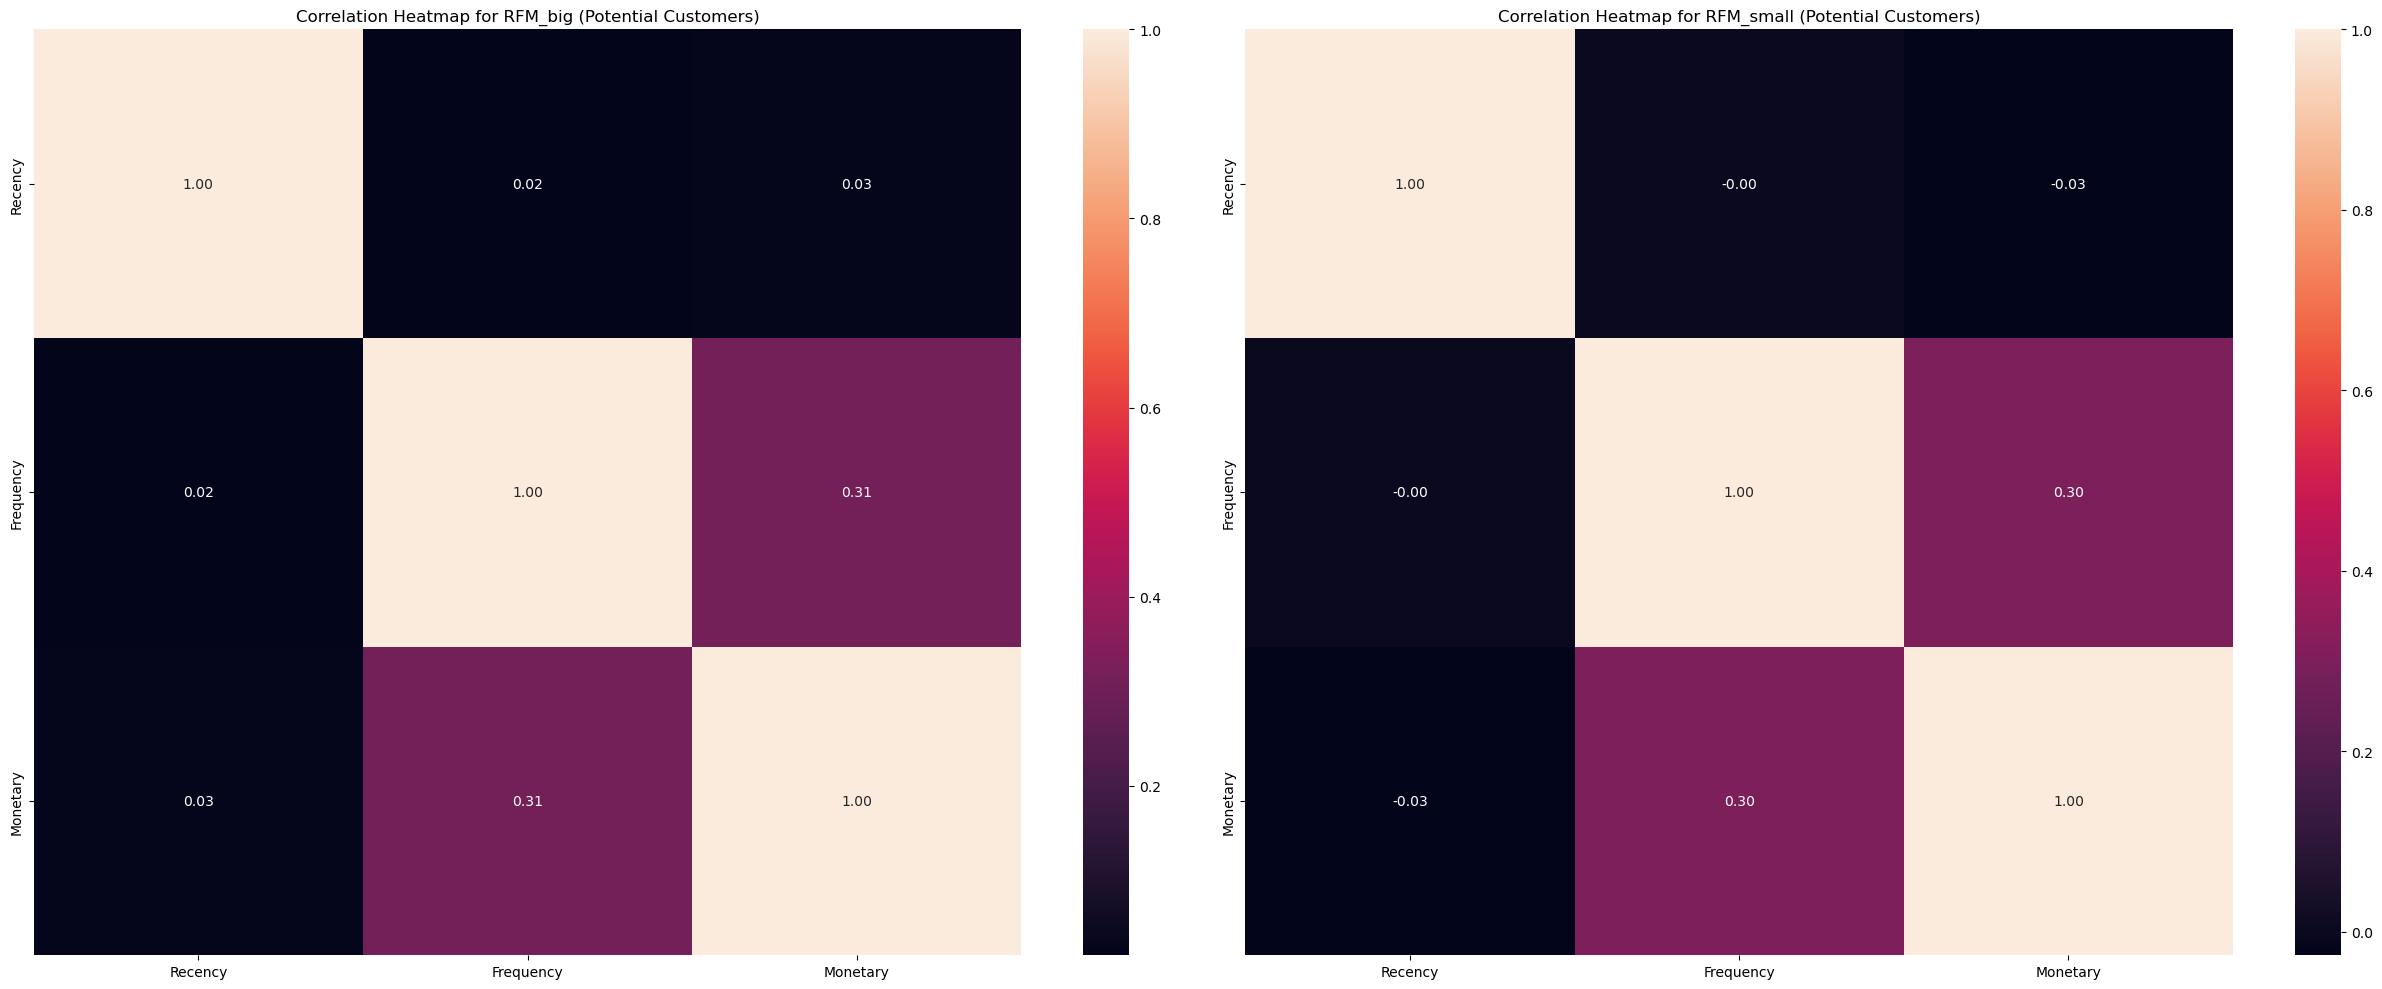

In [78]:
# Filter data with Profile_kmeans = 'Potential'
RFM_big_potential = RFM_big[RFM_big['Profile_kmeans'] == 'Potential']
RFM_small_potential = RFM_small[RFM_small['Profile_kmeans'] == 'Potential']

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Correlation heatmap for RFM_big potential customers
sns.heatmap(RFM_big_potential.iloc[:, 0:3].corr(), annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap for RFM_big (Potential Customers)")

# Correlation heatmap for RFM_small potential customers
sns.heatmap(RFM_small_potential.iloc[:, 0:3].corr(), annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap for RFM_small (Potential Customers)")

plt.tight_layout()
plt.show()


Both SP city and small cities datasets, the correlation between Frequency and Monetary is relatively similar, with a correlation coefficient of approximately 0.55 for SP city and 0.54 for small cities.

This suggests a moderately positive relationship between Frequency (how often customers make purchases) and Monetary (the amount customers spend). In other words, customers who make more frequent purchases tend to spend more, and vice versa.

But it's not enough evidence to support about hypothesis 2. So now, we use the linear regression model

In [79]:
import statsmodels.api as sm

# Prepare data
X = RFM_big_potential['Frequency']
y = RFM_big_potential['Monetary']

# Add constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1190.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          8.64e-248
Time:                        23:30:15   Log-Likelihood:                -73113.
No. Observations:               11147   AIC:                         1.462e+05
Df Residuals:                   11145   BIC:                         1.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5765      4.993     -2.318      0.0

In [80]:
import statsmodels.api as sm

# Prepare data
X = RFM_small_potential['Frequency']
y = RFM_small_potential['Monetary']

# Add constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.44e-307
Time:                        23:30:15   Log-Likelihood:                -99665.
No. Observations:               14870   AIC:                         1.993e+05
Df Residuals:                   14868   BIC:                         1.993e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3129      5.090     -1.044      0.2

> ### Result of Hypothesis 2

Based on the results of the regression analysis:

- For the SP city dataset (large city), the coefficient of the Frequency variable is 316.0715, and for the small cities dataset, it is 383.7317.
- Both coefficients are positive and statistically significant (p-value < 0.05), indicating a positive relationship between Frequency and Monetary.
- The R-squared values for both models are 0.302 and 0.287, respectively, suggesting that around 30% of the variability in Monetary can be explained by Frequency.
- However, it's important to note that the coefficients represent the change in Monetary for a one-unit increase in Frequency. Therefore, we can infer that potential or high-value customers, who are expected to have higher Frequency values, are indeed likely to make purchases more frequently. This conclusion is supported by the statistically significant positive coefficients in both city datasets.

Thus, we **fail to reject the hypothesis** that potential or high-value customers are likely to make purchases more frequently, as the regression analysis provides evidence supporting this claim.

# Conclusion

This project delves into the analysis of customer shopping behavior using RFM (Recency, Frequency, Monetary) data across two distinct datasets: "Big City" and "Small Cities". The primary objectives encompass comparing the distribution of Monetary values among customer segments, exploring the correlation between Frequency and Monetary values for potential and high-value customer segments, and evaluating Hypothesis 2 regarding the frequency of purchases by potential or high-value customers.

Upon analysis, several key findings emerged. Firstly, there were notable variations in the distribution of Monetary values across customer segments in both datasets. Additionally, a positive correlation was observed between Frequency and Monetary values, particularly within potential and high-value customer segments. However, the strength of this correlation varied between large and small cities.

Further examination revealed intriguing insights. In SP city, there was a higher dispersion of Monetary values among potential and high-value segments compared to small cities, where the dispersion was lower. This suggests differing spending behaviors between the two settings. Moreover, while the Low-Value segment comprised the largest number of customers in both cities, the High-Value segment boasted the highest spending.

In the context of Hypothesis 2, while the data did not definitively confirm it, the higher correlation observed in small cities implies a greater likelihood of potential or high-value customers making frequent purchases there.

Beyond these findings, additional insights emerged. Customers in SP city exhibited higher spending tendencies than their counterparts in small cities. Conversely, customers in small cities seemed to demonstrate stronger brand and store loyalty.

In summary, this project provides valuable insights into the intricacies of customer behavior across different city settings. By understanding these nuances, businesses can tailor their marketing and sales strategies to better meet the needs and preferences of their target audience, ultimately driving success and growth.

# Recommendations

- Prioritize High-Value Customers: Focus on retaining and upselling to your largest and most profitable segment. Implement loyalty programs and personalized offers to keep them engaged, and identify opportunities for upselling or cross-selling complementary products.

- Convert Low-Value Customers: Target this segment with promotions and incentives to increase their purchase frequency or order amounts. Use product recommendations based on high-value customer preferences to encourage their conversion.

- Grow the Mid-Value Segment: Although smaller, the mid-value segment holds potential to move towards high-value status. Personalize communication to understand their needs and motivations for more frequent or higher-value purchases.

Important Considerations for Your RFM Model:

- Data Freshness: Ensure customer transaction data is regularly updated for accurate analysis.

- RFM Score Customization: Tailor the weighting of recency, frequency, and monetary value based on your business priorities.

- Segmentation Timeframe: Choose timeframes for analysis that align with your business goals and objectives.

Next Steps:

- Analyze Segment Characteristics: Dive deeper into each segment's behavior, preferred products, and any demographic trends.

- Refine Segmentation: Consider incorporating additional customer attributes beyond RFM for more detailed insights.

# Limitations

While the project provides valuable insights into customer behavior through RFM analysis, its exclusive reliance on this framework overlooks critical factors that could enhance its depth and breadth. By solely focusing on RFM segmentation and correlations between its variables, the project misses opportunities to explore broader aspects of customer behavior, such as basket analysis, product preferences, and demographic information. 

Consequently, the scope remains narrow, limiting the project's ability to offer a comprehensive understanding of customer dynamics and its applicability to informing diverse marketing strategies beyond segmentation.



# Future Work

- Incorporate Basket Analysis: Expand the analysis to include basket or transaction-level data to gain insights into customer purchasing patterns, product affinities, and basket composition. This can provide a more comprehensive understanding of customer behavior and inform targeted marketing strategies.

- Explore Additional Variables: Consider incorporating additional customer attributes such as demographics, psychographics, or geographic data to enrich the segmentation and better understand customer preferences and motivations.

- Implement Predictive Analytics: Utilize machine learning algorithms for predictive modeling to forecast customer behavior, identify high-value customers at risk of churn, and personalize marketing campaigns for improved customer retention and acquisition.

# References

Berger, P. D., & Nasr, N. I. (1998). Customer lifetime value: Marketing models and applications. *Journal of Interactive Marketing, 12*(1), 17-30. 

Blattberg, R. C., Kim, B.-D., & Neslin, S. A. (2008). Database marketing: Analyzing and managing customers. Springer Science & Business Media.

Gupta, S. (2014). RFM analysis. In Wiley StatsRef: Statistics Reference Online (pp. 1-3).

Hughes, A. M. (1994). Strategic database marketing. McGraw-Hill.

Kumar, V., & Reinartz, W. (2012). Customer relationship management: Concept, strategy, and tools. Springer Science & Business Media.

Verhoef, P. C., Venkatesan, R., McAlister, L., Malthouse, E. C., Krafft, M., & Ganesan, S. (2003). CRM in data‐rich multichannel retailing environments: A review and future research directions. *Journal of Interactive Marketing, 17*(2), 51-71.

Hartigan, J. A., & Wong, M. A. (1979). A K-means clustering algorithm. *Journal of the Royal Statistical Society. Series C (Applied Statistics), 28*(1), 100-108.

Jain, A. K. (2010). Data clustering: 50 years beyond K-means. *Pattern Recognition Letters, 31*(8), 651-666.

Steinley, D., & Brusco, M. J. (2008). K-means clustering: A gentle introduction. *The Mathematica Journal, 16*(1), 103-115.

Xu, R., & Wunsch, D. (2005). Survey of clustering algorithms. *IEEE Transactions on Neural Networks, 16*(3), 645-678.

Fildes, R., Kumar, V., & Stec, B. (2009). Model selection for forecasting with competing ARIMA models. *Journal of Business & Economic Statistics, 27*(4), 467-478. [Link](https://journals.sagepub.com/doi/abs/10.1177/1847979018808673)

Hair, J. F., Black, W. C., Babin, B. J., & Anderson, R. E. (2014). Multivariate data analysis (7th ed.). Pearson Education Limited.

Huang, C.-C., Chuang, L.-Y., & Hung, S.-C. (2010). Customer churn prediction using support vector machines in the telecommunication industry. *Expert Systems with Applications, 37*(12), 8483-8490. [Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0267935)

Hughes, G. (1994). Strategic database marketing. McGraw-Hill.
